In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from scipy import stats
from scipy.stats import boxcox
from scipy.special import inv_boxcox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import datetime

In [ ]:
coke = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")

# EDA

In [ ]:
coke.head(10)

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


In [ ]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [ ]:
coke[coke.duplicated()]

,Quarter,Sales


In [ ]:
coke['Quarter_Year'] = coke['Quarter'].str.split('_').apply(lambda x: ' 19'.join(x[:]))

In [ ]:
coke.head()

,Quarter,Sales,Quarter_Year
0,Q1_86,1734.827000,Q1 1986
1,Q2_86,2244.960999,Q2 1986
2,Q3_86,2533.804993,Q3 1986
3,Q4_86,2154.962997,Q4 1986
4,Q1_87,1547.818996,Q1 1987


In [ ]:
coke['Date']=(pd.to_datetime(coke['Quarter_Year'].str.split(' ').apply(lambda x: ''.join(x[::-1])),dayfirst=True))

In [ ]:
coke = coke.assign(Quarter_only = coke['Quarter'].str.extract('(\w{2})'))
coke.head(10)

,Quarter,Sales,Quarter_Year,Date,Quarter_only
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1
5,Q2_87,2104.411995,Q2 1987,1987-04-01,Q2
6,Q3_87,2014.362999,Q3 1987,1987-07-01,Q3
7,Q4_87,1991.746998,Q4 1987,1987-10-01,Q4
8,Q1_88,1869.049999,Q1 1988,1988-01-01,Q1
9,Q2_88,2313.631996,Q2 1988,1988-04-01,Q2


In [ ]:
coke["Date"] = pd.to_datetime(coke.Date,format="%b-%y")
coke["month"] = coke.Date.dt.strftime("%b")
coke["year"] = coke.Date.dt.strftime("%Y")

In [ ]:
coke.head()

,Quarter,Sales,Quarter_Year,Date,Quarter_only,month,year
0,Q1_86,1734.827000,Q1 1986,1986-01-01,Q1,Jan,1986
1,Q2_86,2244.960999,Q2 1986,1986-04-01,Q2,Apr,1986
2,Q3_86,2533.804993,Q3 1986,1986-07-01,Q3,Jul,1986
3,Q4_86,2154.962997,Q4 1986,1986-10-01,Q4,Oct,1986
4,Q1_87,1547.818996,Q1 1987,1987-01-01,Q1,Jan,1987


In [ ]:
coke.tail(10)

,Quarter,Sales,Quarter_Year,Date,Quarter_only,month,year
32,Q1_94,3352.0,Q1 1994,1994-01-01,Q1,Jan,1994
33,Q2_94,4342.0,Q2 1994,1994-04-01,Q2,Apr,1994
34,Q3_94,4461.0,Q3 1994,1994-07-01,Q3,Jul,1994
35,Q4_94,4017.0,Q4 1994,1994-10-01,Q4,Oct,1994
36,Q1_95,3854.0,Q1 1995,1995-01-01,Q1,Jan,1995
37,Q2_95,4936.0,Q2 1995,1995-04-01,Q2,Apr,1995
38,Q3_95,4895.0,Q3 1995,1995-07-01,Q3,Jul,1995
39,Q4_95,4333.0,Q4 1995,1995-10-01,Q4,Oct,1995
40,Q1_96,4194.0,Q1 1996,1996-01-01,Q1,Jan,1996
41,Q2_96,5253.0,Q2 1996,1996-04-01,Q2,Apr,1996


In [ ]:
quarter_sales = coke.loc[:, ['Date', 'Sales']]

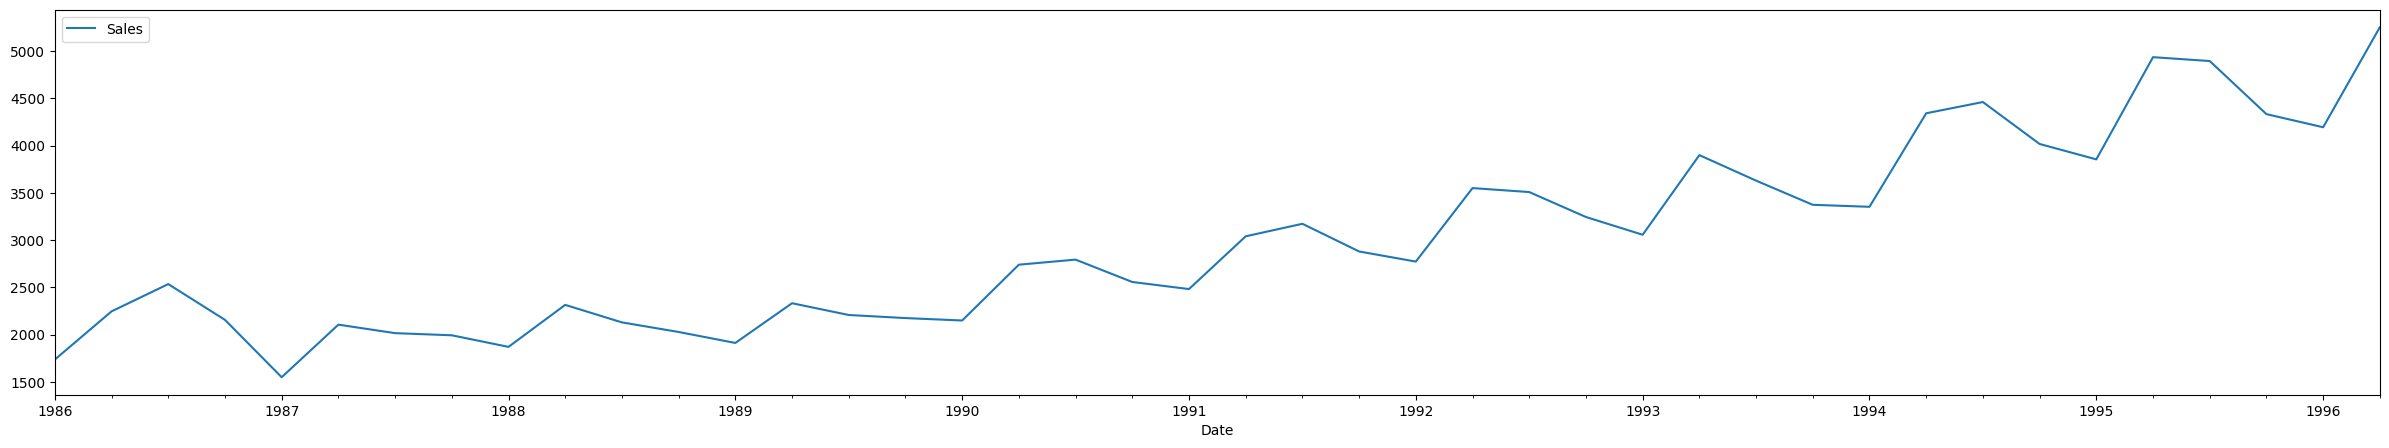

In [ ]:
quarter_sales.plot(x='Date', y='Sales', kind='line',figsize=(30,5))
plt.show()

<Axes: xlabel='month', ylabel='year'>

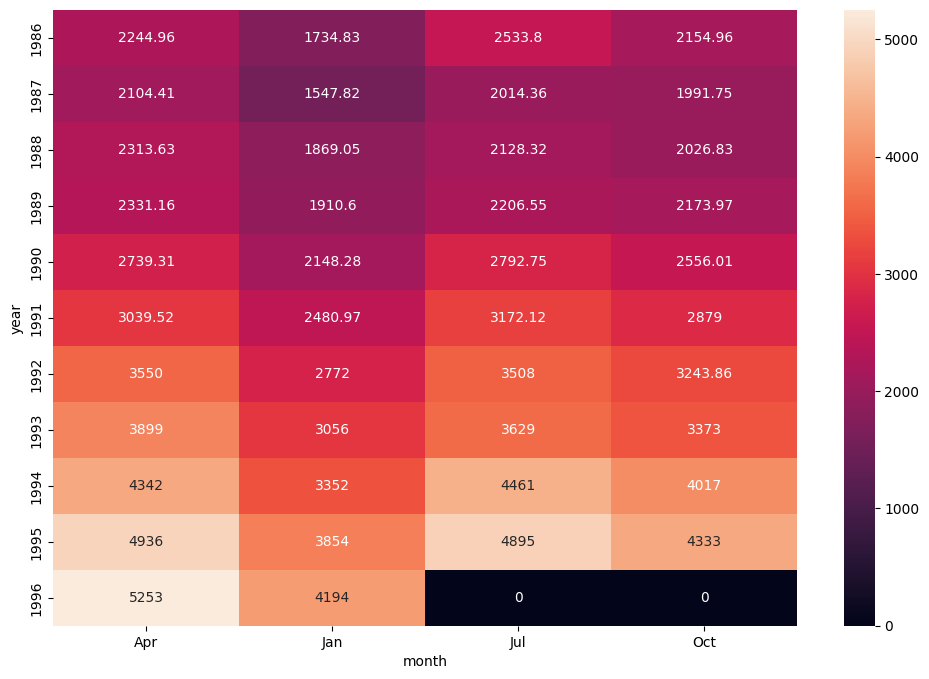

In [ ]:
plt.figure(figsize = (12,8))
heatmap = pd.pivot_table(data = coke, values="Sales", index="year", columns="month", aggfunc="mean", fill_value=0)
sns.heatmap(heatmap, annot = True, fmt = "g")

<Axes: xlabel='year', ylabel='Sales'>

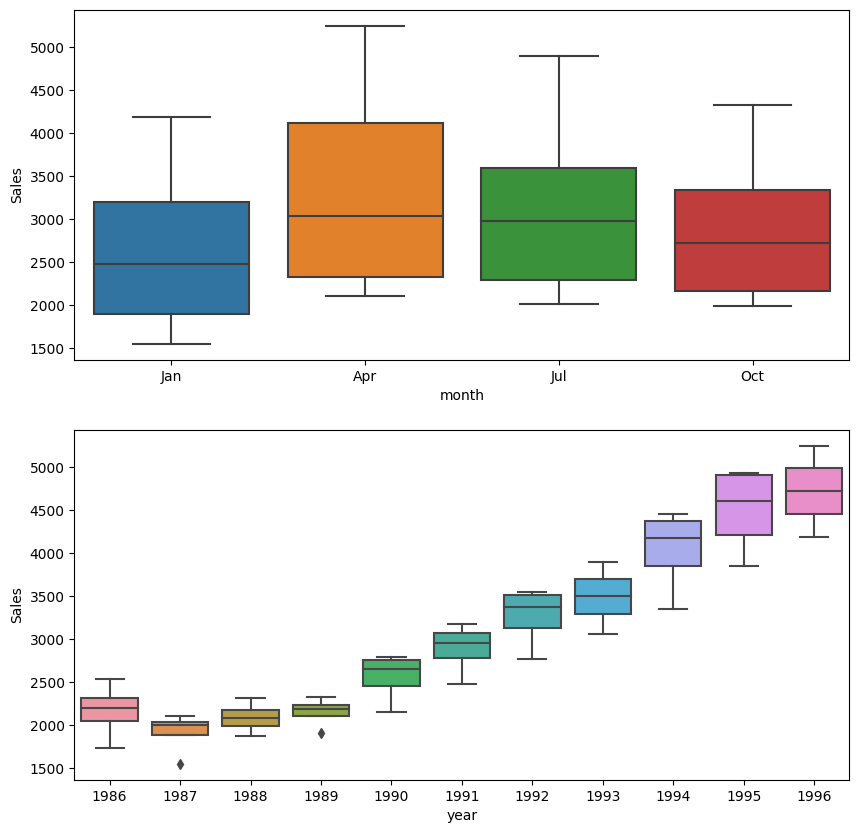

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(211)
sns.boxplot(x = 'month', y = 'Sales', data = coke)
plt.subplot(212)
sns.boxplot(x = 'year', y = 'Sales', data = coke)

<Axes: ylabel='Density'>

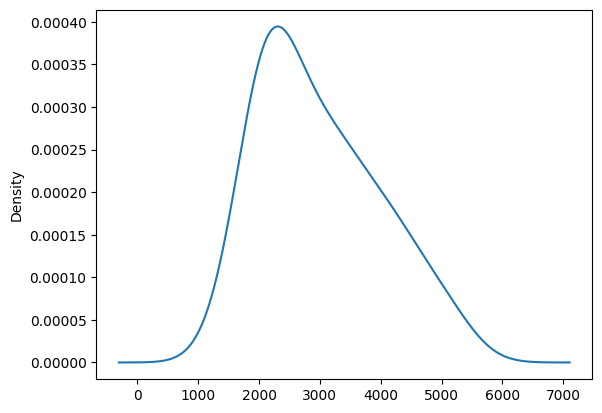

In [ ]:
coke["Sales"].plot(kind = 'kde')

<Axes: title={'center': 'Sales in Years'}, xlabel='year', ylabel='Sales'>

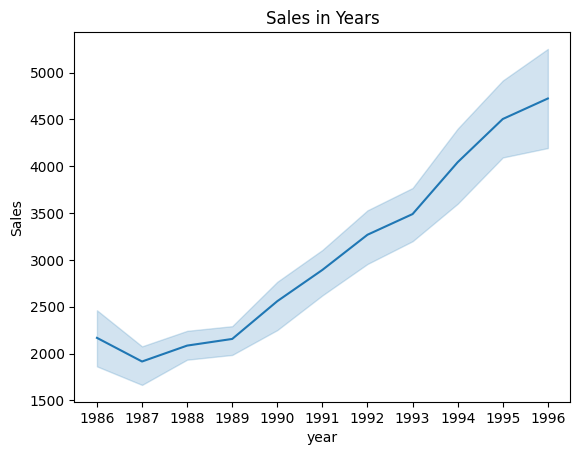

In [ ]:
plt.title("Sales in Years")
sns.lineplot(y = coke["Sales"], x = coke["year"])

In [ ]:
coke['t'] = np.arange(1,len(coke)+1)
coke['t_squared'] = np.square(coke.t)
Quarter = pd.get_dummies(coke["Quarter_only"])
Quarter = Quarter[['Q1','Q2','Q3','Q4']]
coke = pd.concat([coke, Quarter], axis = 1)
coke['log_Sales'] = np.log(coke['Sales'])

# Train-Test Split

In [ ]:
Train = coke.head(30)
Test = coke.tail(12)

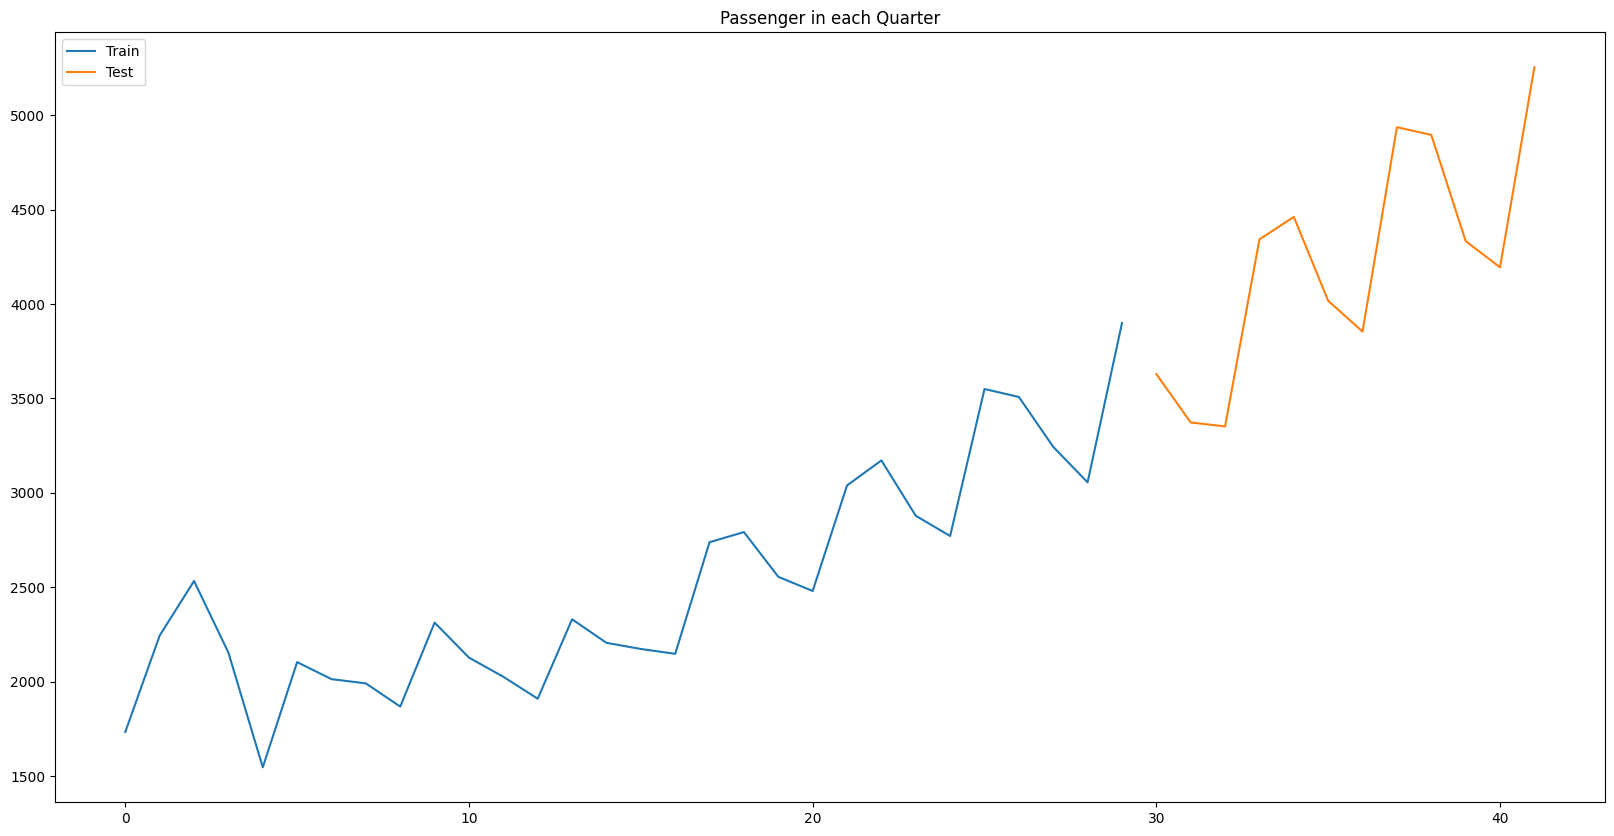

In [ ]:
plt.figure(figsize = (20,10))
plt.title("Passenger in each Quarter")
plt.plot(Train["Sales"], label = "Train")
plt.plot(Test["Sales"], label = "Test")
plt.legend(loc = "best")

In [ ]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Quarter       42 non-null     object        
 1   Sales         42 non-null     float64       
 2   Quarter_Year  42 non-null     object        
 3   Date          42 non-null     datetime64[ns]
 4   Quarter_only  42 non-null     object        
 5   month         42 non-null     object        
 6   year          42 non-null     object        
 7   t             42 non-null     int64         
 8   t_squared     42 non-null     int64         
 9   Q1            42 non-null     uint8         
 10  Q2            42 non-null     uint8         
 11  Q3            42 non-null     uint8         
 12  Q4            42 non-null     uint8         
 13  log_Sales     42 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(5), uint8(4)
memory usage: 3.6+ KB


# Naive Models

Lag plot

<Axes: title={'center': 'Lag Plot'}, xlabel='y(t)', ylabel='y(t + 4)'>

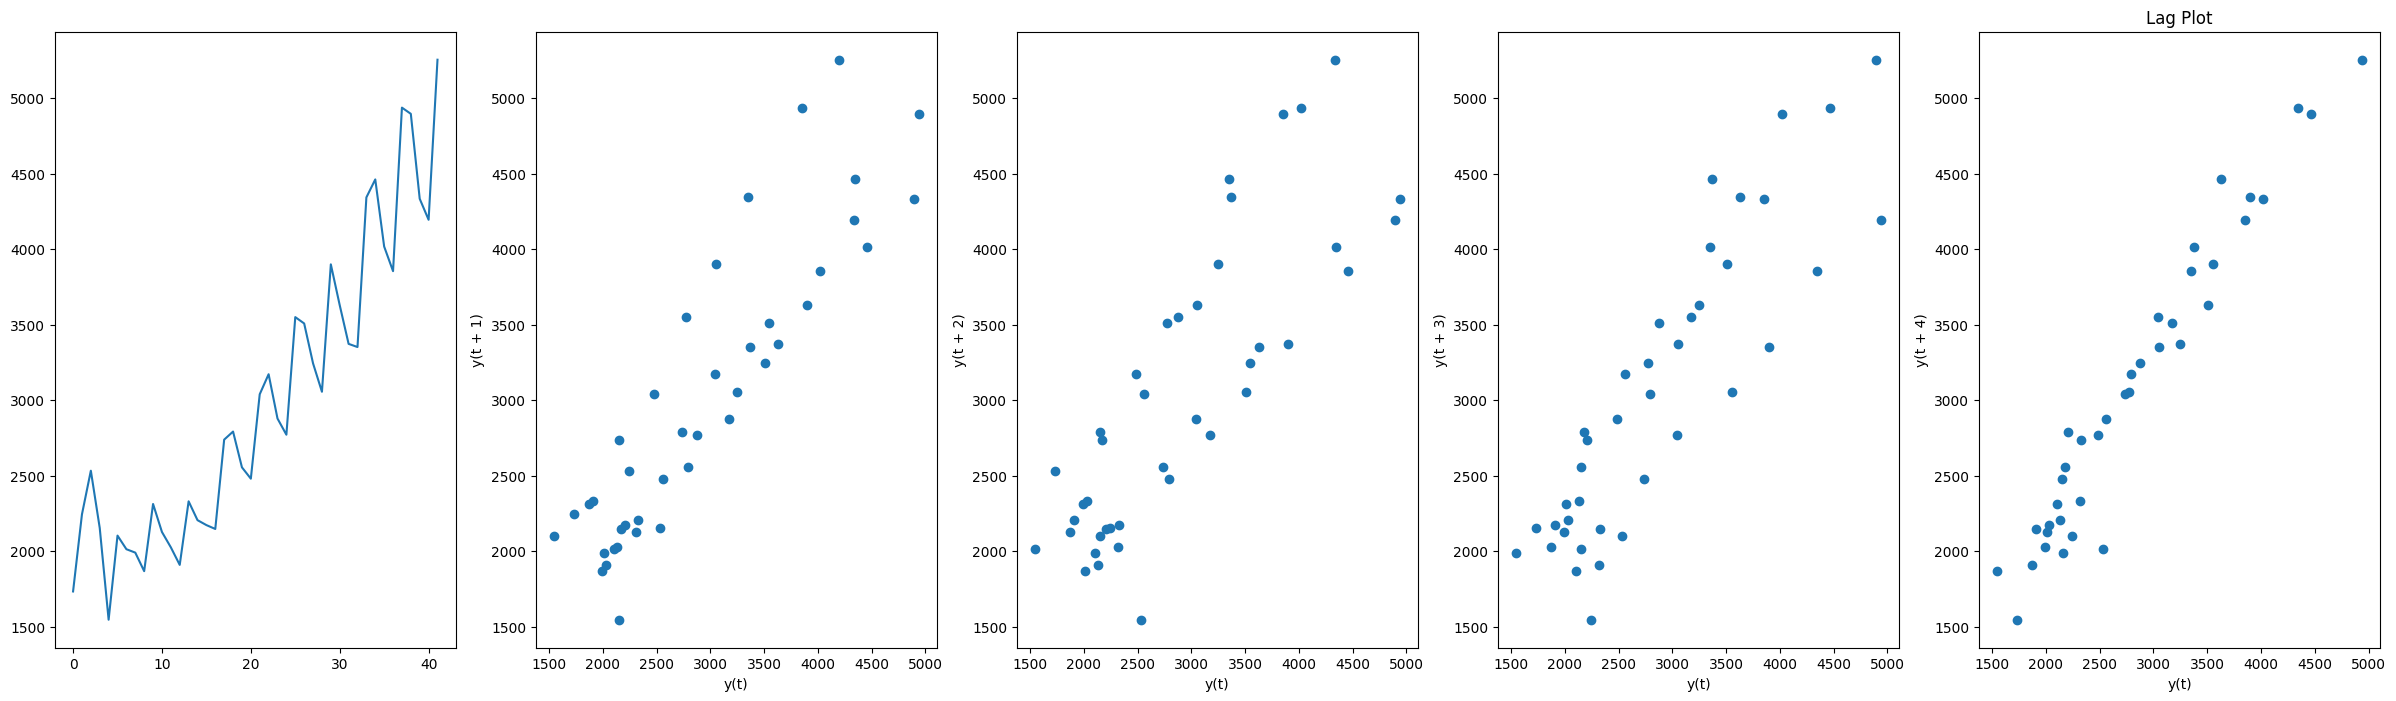

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (30,8))
plt.title("Lag Plot")
ax[0].plot(coke["Sales"])
pd.plotting.lag_plot(coke["Sales"], lag = 1, ax = ax[1])
pd.plotting.lag_plot(coke["Sales"], lag = 2, ax = ax[2])
pd.plotting.lag_plot(coke["Sales"], lag = 3, ax = ax[3])
pd.plotting.lag_plot(coke["Sales"], lag = 4, ax = ax[4])

# Linear Models

In [ ]:
linear_model = smf.ols('Sales~t', data = Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

714.0144483281299

In [ ]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     67.86
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           5.77e-09
Time:                        17:43:23   Log-Likelihood:                -214.65
No. Observations:                  30   AIC:                             433.3
Df Residuals:                      28   BIC:                             436.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1640.3537    120.095     13.659      0.000    1394.350    1886.358
t             55.7274      6.765      8.238      0.000      41.870      69.584
==============================================================================
Omnibus:                        2.047   Durbin-Watson:                   1.303
Prob(Omnibus):                  0.359   Jarque-Bera (JB):                1.854
Skew:                           0.549   Prob(JB):                        0.396
Kurtosis:                       2.473   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Exponential Model

In [ ]:
exp_model = smf.ols('log_Sales~t', data = Train).fit()
pred_exp =  pd.Series(exp_model.predict(pd.DataFrame(Test['t'])))
rmse_exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

552.2821039079217

In [ ]:
exp_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Sales   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     67.47
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           6.11e-09
Time:                        17:44:42   Log-Likelihood:                 20.823
No. Observations:                  30   AIC:                            -37.65
Df Residuals:                      28   BIC:                            -34.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4645      0.047    159.325      0.000       7.369       7.560
t              0.0217      0.003      8.214      0.000       0.016       0.027
==============================================================================
Omnibus:                        0.963   Durbin-Watson:                   1.482
Prob(Omnibus):                  0.618   Jarque-Bera (JB):                0.706
Skew:                           0.366   Prob(JB):                        0.702
Kurtosis:                       2.832   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Quadratic Model

In [ ]:
qdrtc_model = smf.ols('Sales~t+t_squared', data = Train).fit()
pred_qdrtc =  pd.Series(qdrtc_model .predict(pd.DataFrame(Test[['t',"t_squared"]])))
rmse_qdrtc = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.array(pred_qdrtc)))**2))
rmse_qdrtc

646.2715428311304

In [ ]:
qdrtc_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     57.42
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           1.88e-10
Time:                        17:47:52   Log-Likelihood:                -208.23
No. Observations:                  30   AIC:                             422.5
Df Residuals:                      27   BIC:                             426.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2092.2906    154.596     13.534      0.000    1775.085    2409.496
t            -29.0108     22.989     -1.262      0.218     -76.180      18.158
t_squared      2.7335      0.720      3.799      0.001       1.257       4.210
==============================================================================
Omnibus:                        1.074   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.585   Jarque-Bera (JB):                0.859
Skew:                          -0.083   Prob(JB):                        0.651
Kurtosis:                       2.188   Cond. No.                     1.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Additive Seasonality

In [ ]:
add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4', data = Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1778.0065467941367

In [ ]:
add_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     1.583
Date:                Sun, 23 Jul 2023   Prob (F-statistic):              0.218
Time:                        17:49:05   Log-Likelihood:                -230.59
No. Observations:                  30   AIC:                             469.2
Df Residuals:                      26   BIC:                             474.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2004.4613     82.893     24.181      0.000    1834.072    2174.850
Q1           185.4827    175.843      1.055      0.301    -175.967     546.933
Q2           773.2888    175.843      4.398      0.000     411.839    1134.739
Q3           617.8113    185.354      3.333      0.003     236.810     998.813
Q4           427.8784    185.354      2.308      0.029      46.877     808.880
==============================================================================
Omnibus:                        4.311   Durbin-Watson:                   0.105
Prob(Omnibus):                  0.116   Jarque-Bera (JB):                2.896
Skew:                           0.588   Prob(JB):                        0.235
Kurtosis:                       2.033   Cond. No.                     1.55e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Multiplicative Seasonality

In [ ]:
mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4', data = Train).fit()
pred_mul_sea = pd.Series(mul_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_mul = np.sqrt(np.mean((np.array(Test['Sales'])-np.exp(pred_mul_sea))**2))
rmse_mul

1828.9238912138117

In [ ]:
mul_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Sales   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.774
Date:                Sun, 23 Jul 2023   Prob (F-statistic):              0.177
Time:                        17:50:40   Log-Likelihood:                 5.2179
No. Observations:                  30   AIC:                            -2.436
Df Residuals:                      26   BIC:                             3.169
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2412      0.032    195.196      0.000       6.175       6.307
Q1             1.4254      0.068     21.015      0.000       1.286       1.565
Q2             1.6647      0.068     24.543      0.000       1.525       1.804
Q3             1.6113      0.071     22.537      0.000       1.464       1.758
Q4             1.5398      0.071     21.537      0.000       1.393       1.687
==============================================================================
Omnibus:                        6.253   Durbin-Watson:                   0.122
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                2.501
Skew:                           0.376   Prob(JB):                        0.286
Kurtosis:                       1.803   Cond. No.                     1.55e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.56e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Multiplicative additive seasonality

In [ ]:
mul_ad_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4', data = Train).fit()
pred_mul_ad_sea = pd.Series(mul_ad_sea.predict(Test[['t','Q1','Q2','Q3','Q4']]))
rmse_mul_ad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_mul_ad_sea)))**2))
rmse_mul_ad

410.24970596082767

In [ ]:
mul_ad_sea.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Sales   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     37.94
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           2.83e-10
Time:                        17:52:46   Log-Likelihood:                 31.764
No. Observations:                  30   AIC:                            -53.53
Df Residuals:                      25   BIC:                            -46.52
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9754      0.028    216.544      0.000       5.919       6.032
t              0.0214      0.002     11.033      0.000       0.017       0.025
Q1             1.3697      0.029     47.238      0.000       1.310       1.429
Q2             1.5875      0.029     54.006      0.000       1.527       1.648
Q3             1.5556      0.031     50.975      0.000       1.493       1.618
Q4             1.4626      0.031     47.337      0.000       1.399       1.526
==============================================================================
Omnibus:                        3.984   Durbin-Watson:                   0.609
Prob(Omnibus):                  0.136   Jarque-Bera (JB):                2.483
Skew:                           0.635   Prob(JB):                        0.289
Kurtosis:                       3.612   Cond. No.                     2.31e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.78e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

# Data Based Forcasting Models

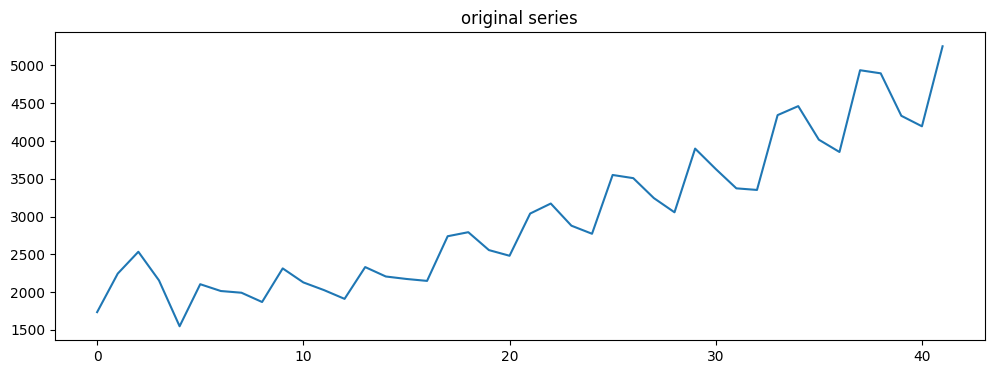

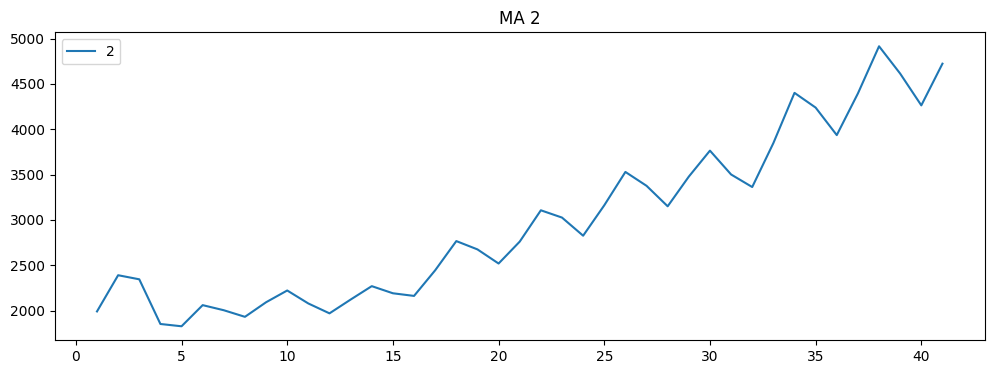

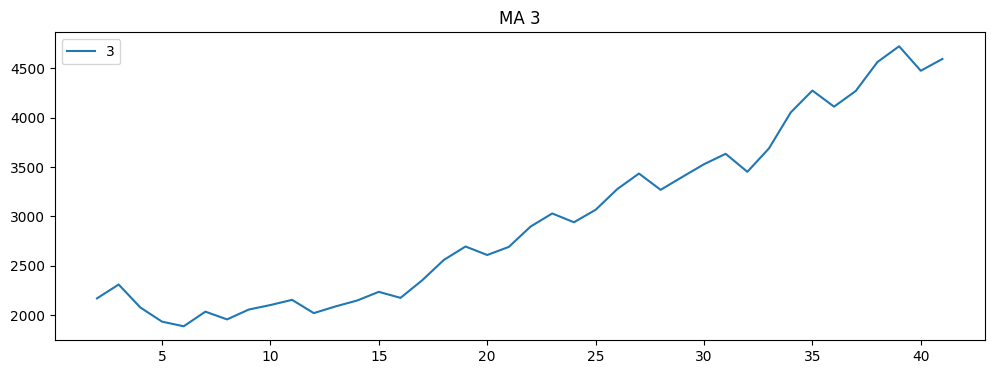

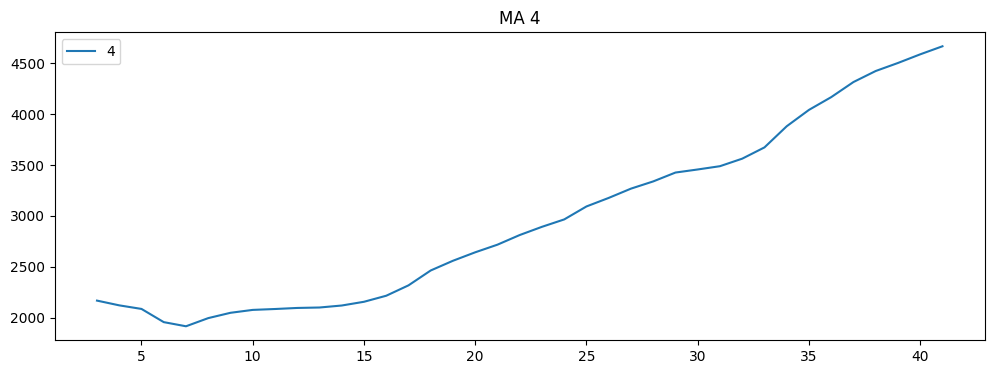

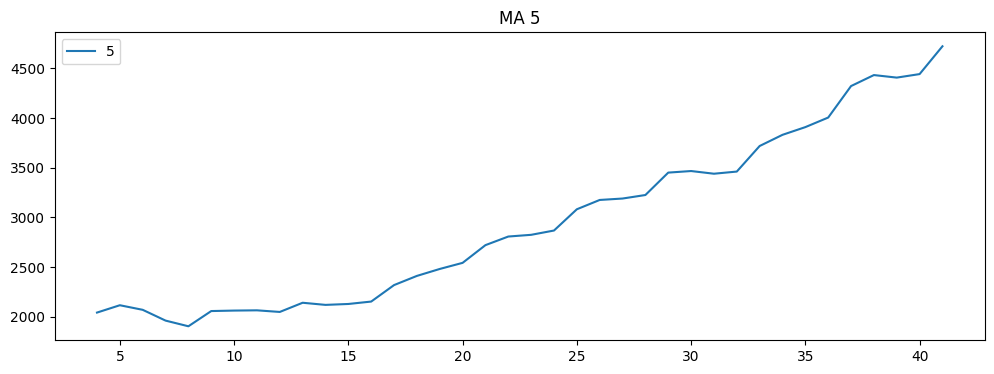

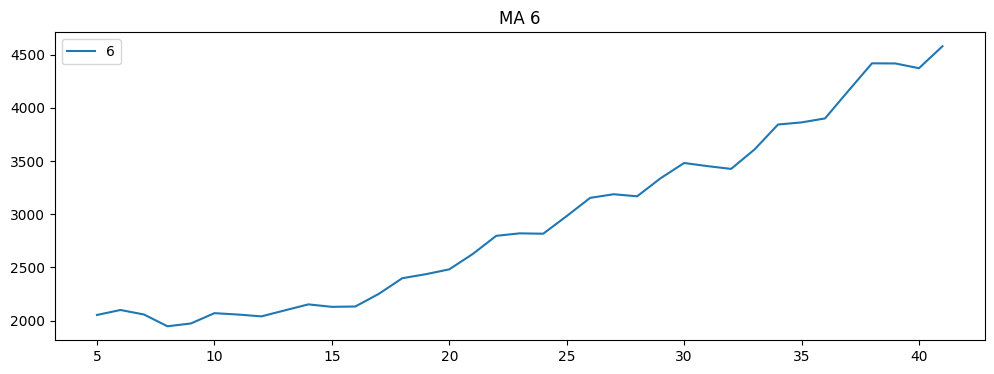

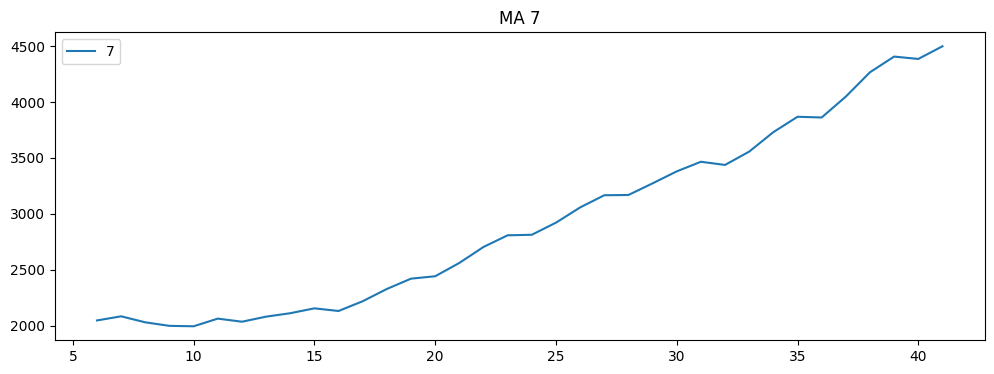

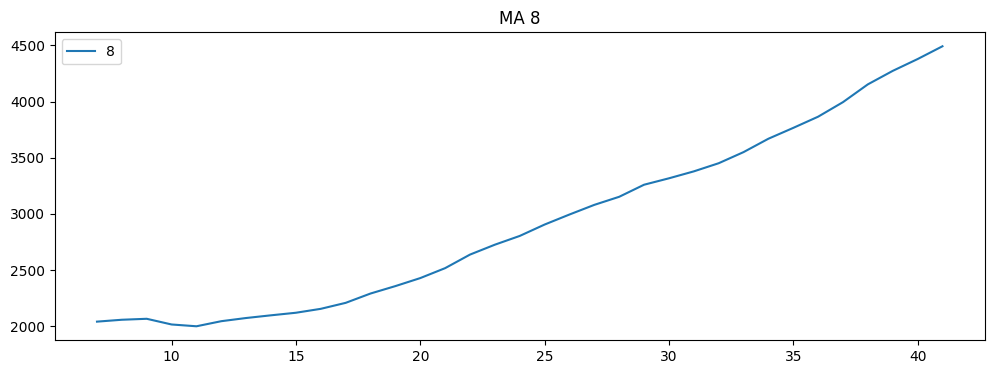

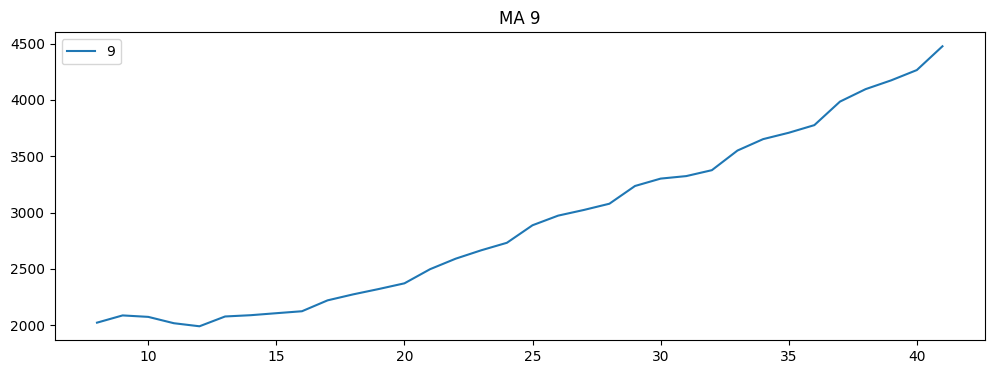

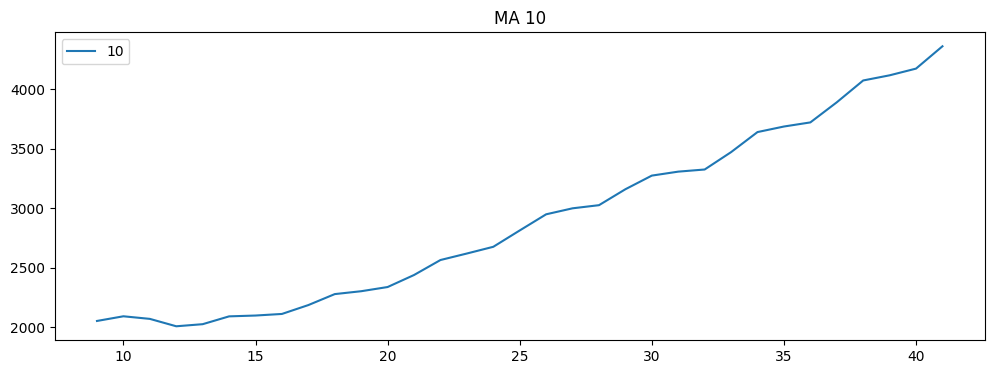

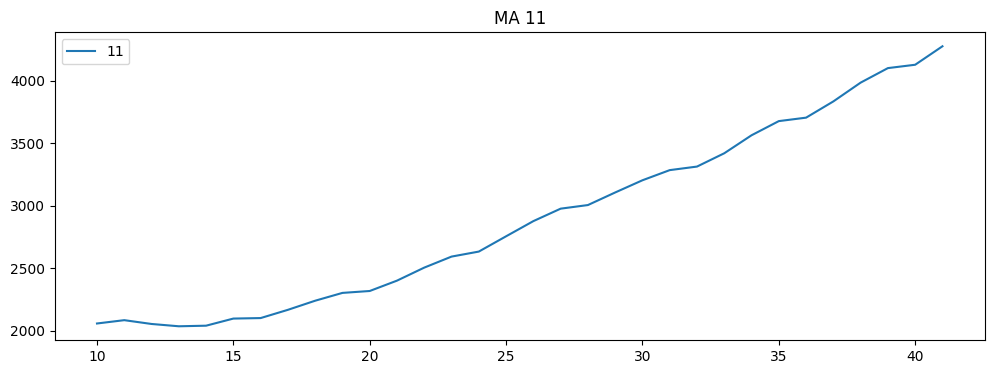

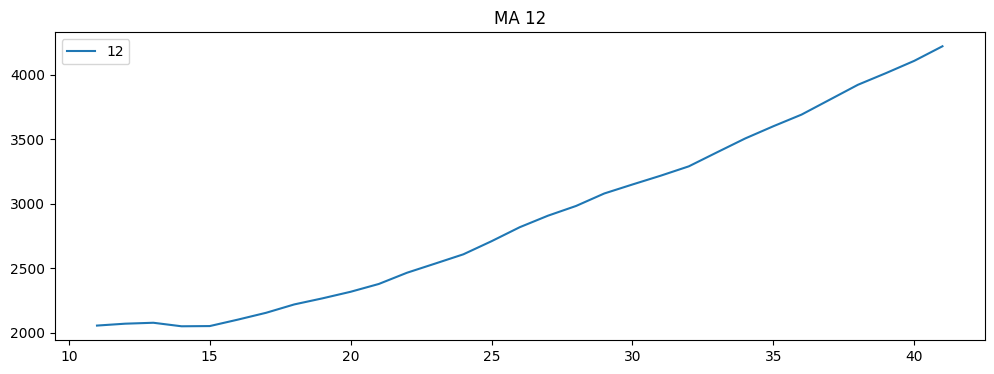

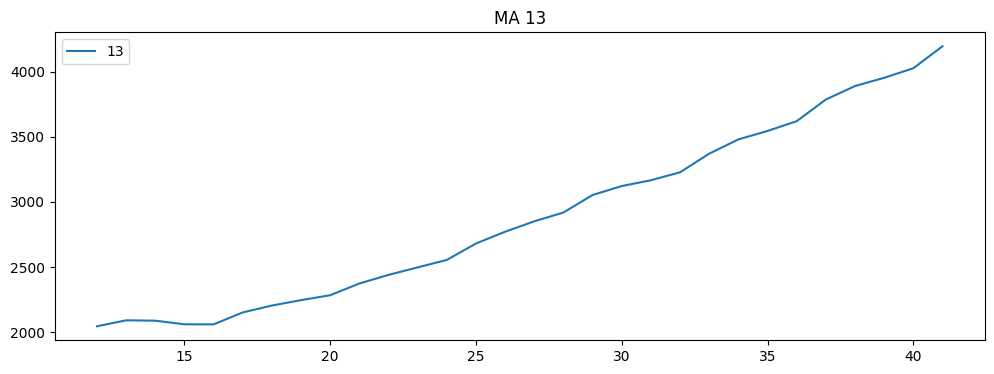

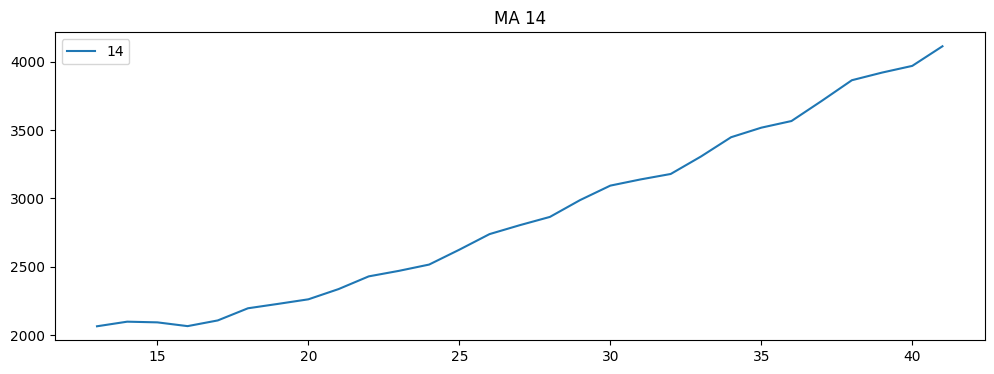

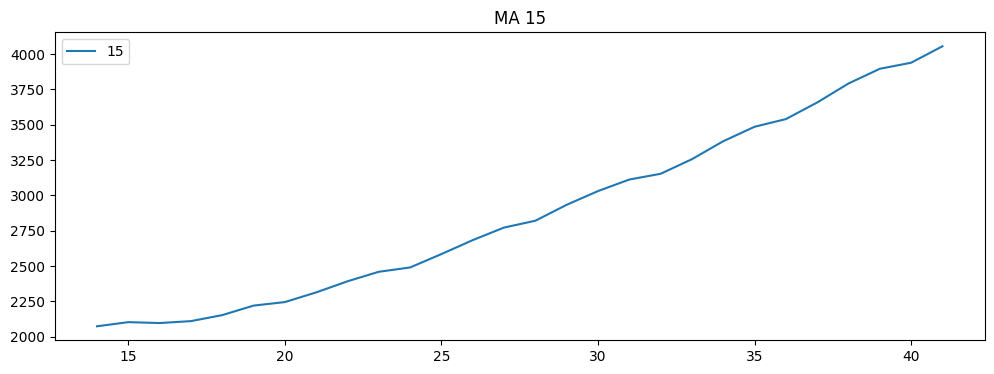

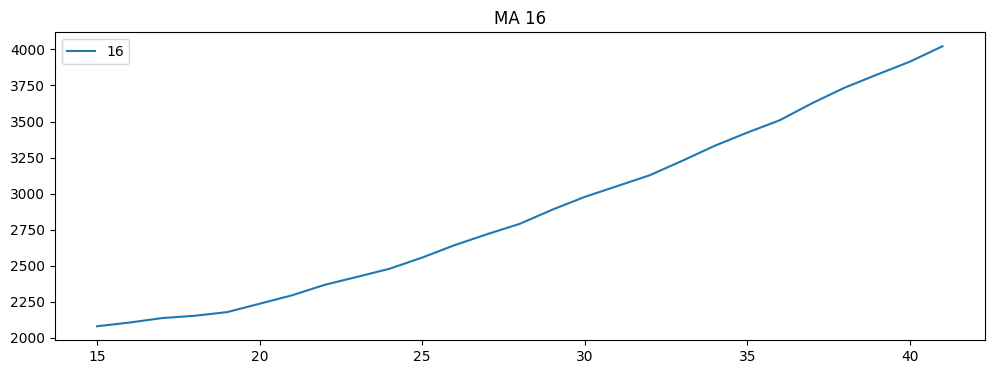

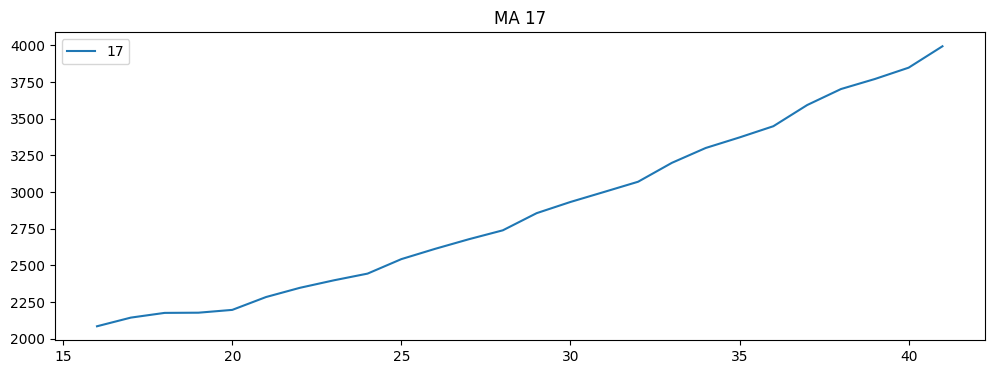

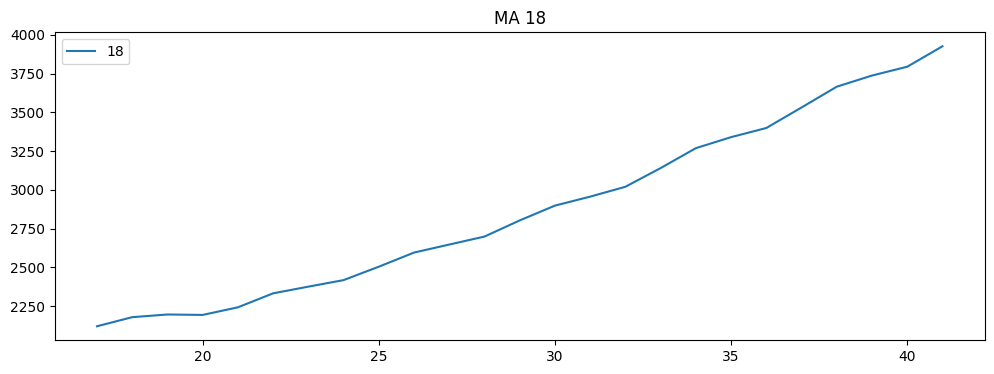

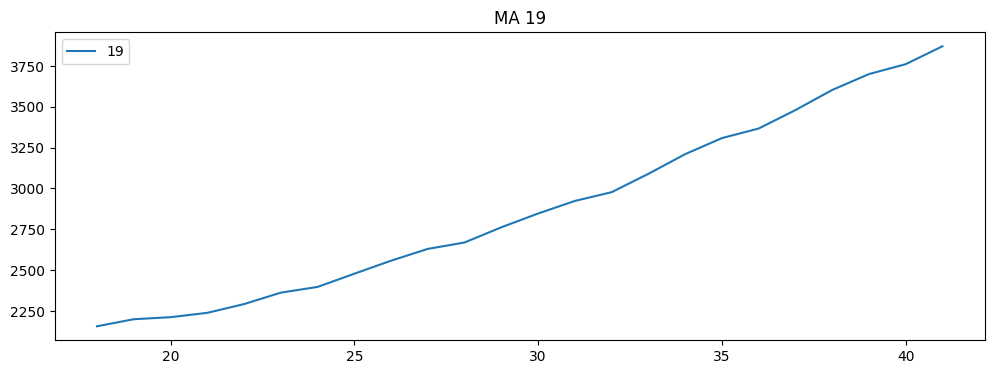

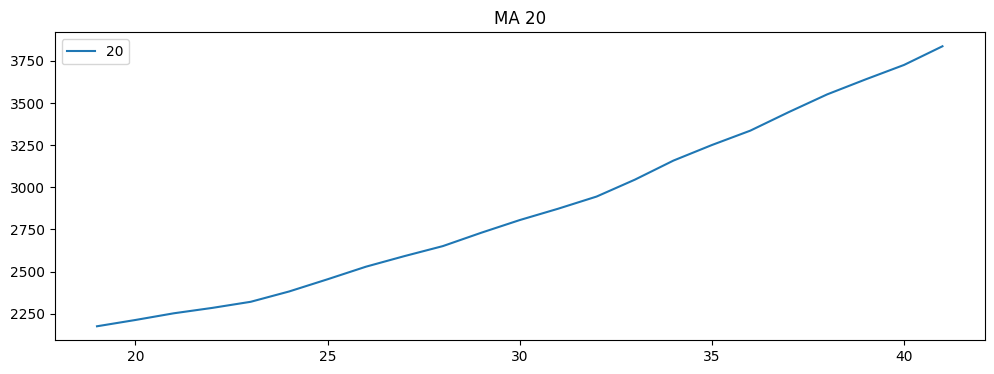

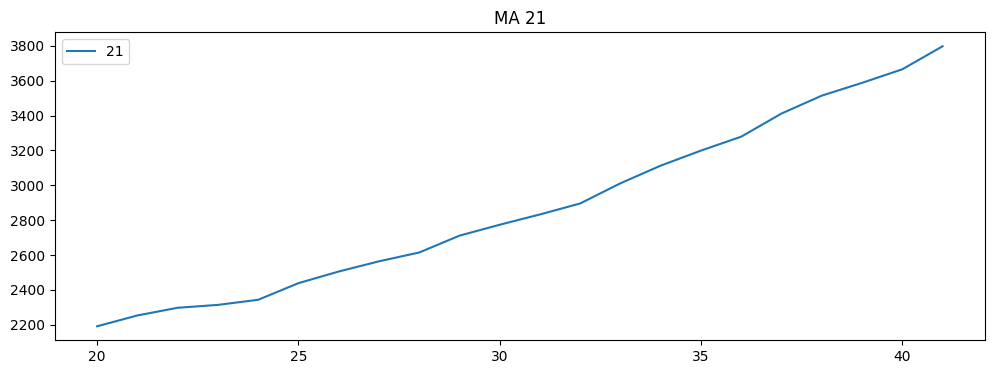

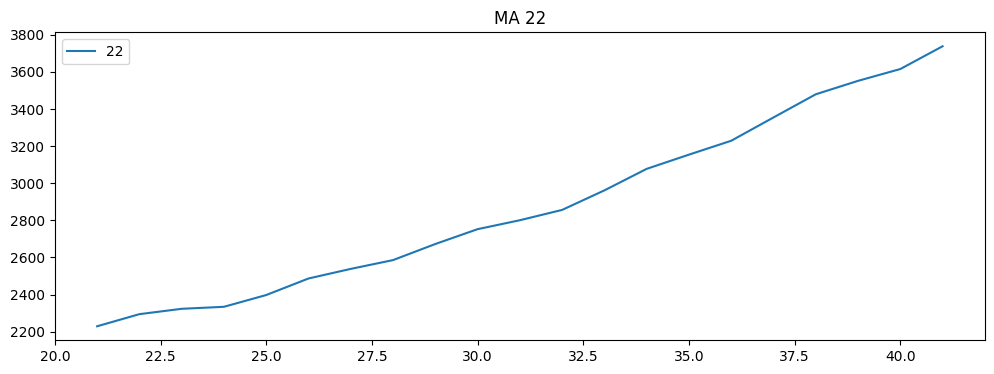

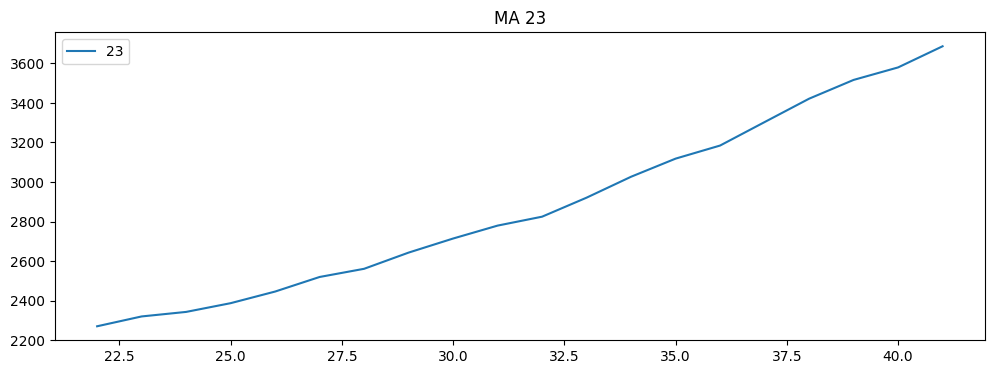

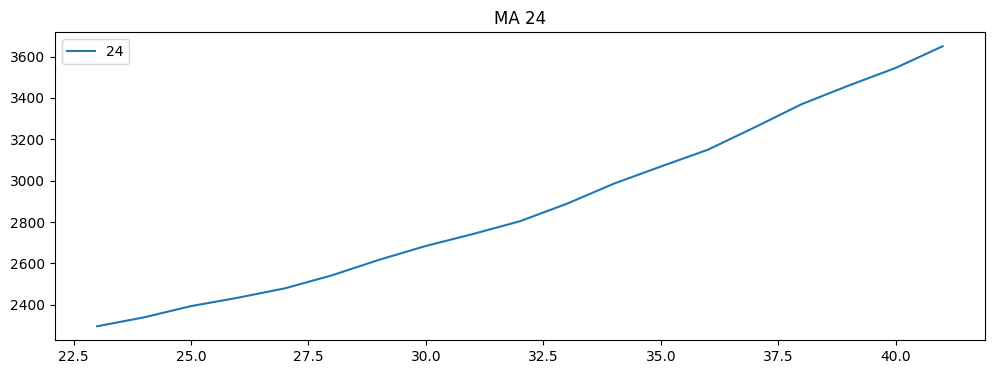

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(coke["Sales"], label = "org")
plt.title("original series")

for i in range(2,25):
  plt.figure(figsize = (12,4))
  plt.plot(coke["Sales"].rolling(i).mean(), label = str(i))
  plt.title("MA "+str(i))
  plt.legend(loc = 'best')
  plt.show()

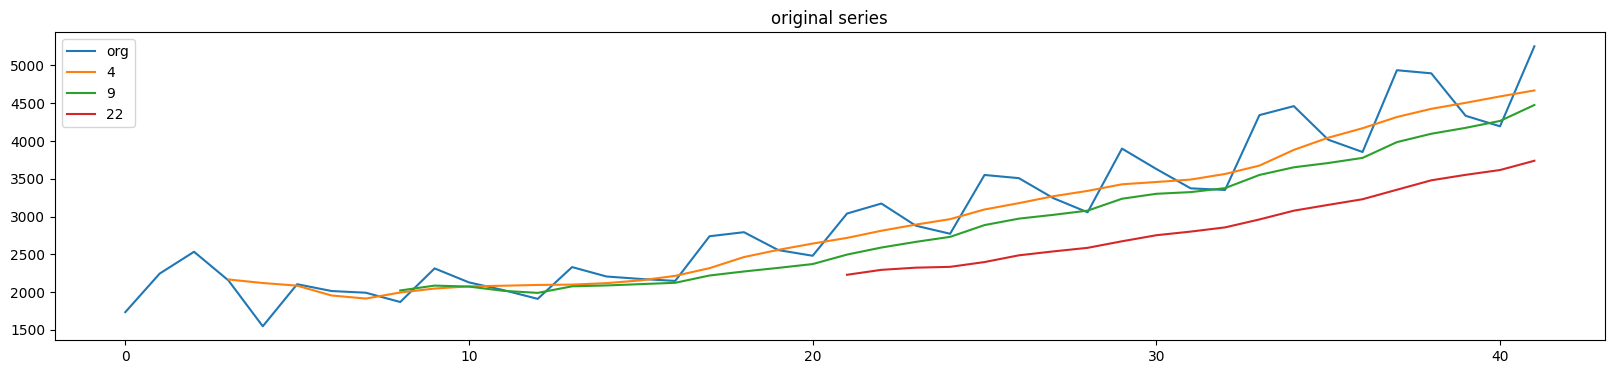

In [ ]:
plt.figure(figsize = (20,4))
coke.Sales.plot(label = "org")
plt.title("original series")

for i in (4,9,22):
  plt.plot(coke["Sales"].rolling(i).mean(), label = str(i))
  plt.legend(loc = 'best')

# Time Series Decomosition plot

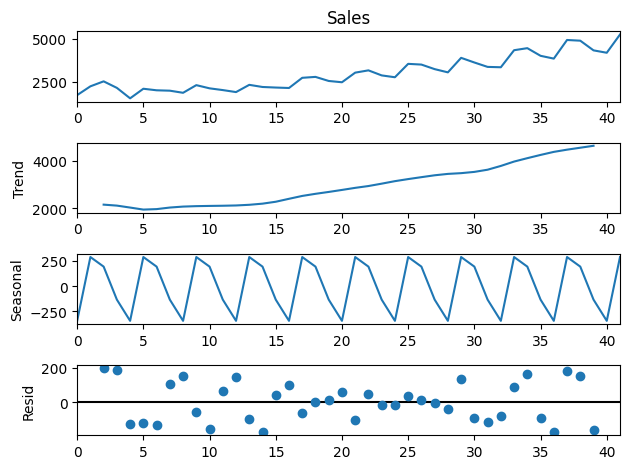

In [ ]:
decomposed_data=seasonal_decompose(coke["Sales"], period = 4)
decomposed_data.plot()
plt.show()

# ACF and PACF plots

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


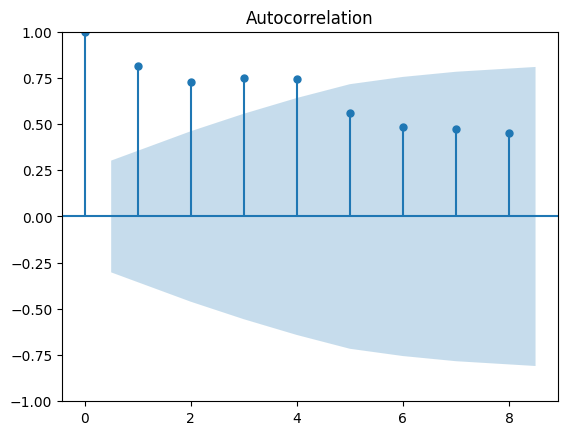

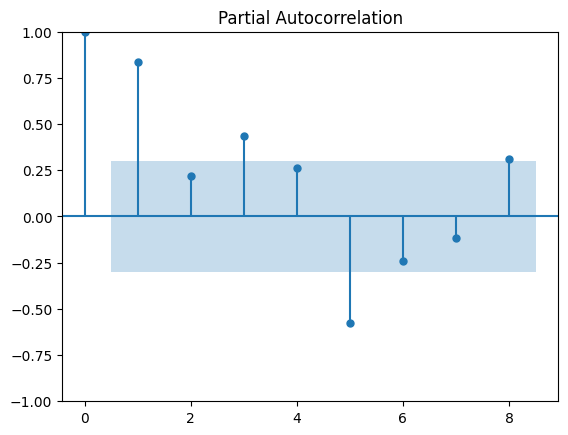

In [ ]:
tsa_plots.plot_acf(coke.Sales, lags = 8)
tsa_plots.plot_pacf(coke.Sales, lags = 8)
plt.show()

# EXPONENTIAL METHODS

In [ ]:
def MAPE(pred,orig):
  temp = np.abs((pred-orig)/pred)*100
  return np.mean(temp)

# Simple Exponential Smoothing

In [ ]:
Test

,Quarter,Sales,Quarter_Year,Date,Quarter_only,month,year,t,t_squared,Q1,Q2,Q3,Q4,log_Sales
30,Q3_93,3629.0,Q3 1993,1993-07-01,Q3,Jul,1993,31,961,0,0,1,0,8.196712
31,Q4_93,3373.0,Q4 1993,1993-10-01,Q4,Oct,1993,32,1024,0,0,0,1,8.123558
32,Q1_94,3352.0,Q1 1994,1994-01-01,Q1,Jan,1994,33,1089,1,0,0,0,8.117312
33,Q2_94,4342.0,Q2 1994,1994-04-01,Q2,Apr,1994,34,1156,0,1,0,0,8.376090
34,Q3_94,4461.0,Q3 1994,1994-07-01,Q3,Jul,1994,35,1225,0,0,1,0,8.403128
35,Q4_94,4017.0,Q4 1994,1994-10-01,Q4,Oct,1994,36,1296,0,0,0,1,8.298291
36,Q1_95,3854.0,Q1 1995,1995-01-01,Q1,Jan,1995,37,1369,1,0,0,0,8.256867
37,Q2_95,4936.0,Q2 1995,1995-04-01,Q2,Apr,1995,38,1444,0,1,0,0,8.504311
38,Q3_95,4895.0,Q3 1995,1995-07-01,Q3,Jul,1995,39,1521,0,0,1,0,8.495970
39,Q4_95,4333.0,Q4 1995,1995-10-01,Q4,Oct,1995,40,1600,0,0,0,1,8.374015


In [ ]:
Test.index[0]

30

In [ ]:
Test.index[-1]

41

In [ ]:
SES = []
x = np.linspace(0.1,1,20)
for i in x:
    ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level = i)
    pred_ses = ses_model.predict(start=Test.index[0], end = Test.index[-1])

    score_simple = MAPE(Test["Sales"],pred_ses)
    SES.append((i,score_simple))
    print("smoothing_level ",i,"-->","MAPE Error",score_simple)


smoothing_level  0.1 --> MAPE Error 29.77617929639335
smoothing_level  0.1473684210526316 --> MAPE Error 25.340720497213095
smoothing_level  0.19473684210526315 --> MAPE Error 22.318016266792498
smoothing_level  0.24210526315789474 --> MAPE Error 20.21252031462325
smoothing_level  0.2894736842105263 --> MAPE Error 18.737187331704277
smoothing_level  0.33684210526315794 --> MAPE Error 17.993959946939963
smoothing_level  0.38421052631578945 --> MAPE Error 17.4111903513618
smoothing_level  0.43157894736842106 --> MAPE Error 16.904039957883697
smoothing_level  0.4789473684210527 --> MAPE Error 16.440766083785253
smoothing_level  0.5263157894736842 --> MAPE Error 16.000108642757365
smoothing_level  0.5736842105263158 --> MAPE Error 15.567415922655139
smoothing_level  0.6210526315789474 --> MAPE Error 15.13242606798993
smoothing_level  0.6684210526315789 --> MAPE Error 14.772385226797065
smoothing_level  0.7157894736842105 --> MAPE Error 14.461485355761747
smoothing_level  0.7631578947368421

In [ ]:
SEM=pd.DataFrame(SES,columns=["smoothing_level","score"])
SEM.sort_values(["score"])
SEM.set_index("smoothing_level",inplace=True)
SEM.sort_values(by=[ "score"], ascending=[True], inplace=True)
SEM

,score
smoothing_level,
1.000000,12.536746
0.952632,12.747336
0.905263,13.095058
0.857895,13.455459
0.810526,13.803586
0.763158,14.138882
0.715789,14.461485
0.668421,14.772385
0.621053,15.132426


In [ ]:
ses_model = SimpleExpSmoothing(Train["Sales"]).fit(smoothing_level = 1.000000)
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
pred_ses

30    3899.0
31    3899.0
32    3899.0
33    3899.0
34    3899.0
35    3899.0
36    3899.0
37    3899.0
38    3899.0
39    3899.0
40    3899.0
41    3899.0
dtype: float64

# Double Exponential Method(Holt Method)

In [ ]:
alphas=np.arange(0.1,1,0.9/10)
betas=np.arange(0.1,1,0.9/10)
l=[]
for i in alphas :
    for j in betas:
        hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)

        pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])

        score=MAPE(pred_hw,Test.Sales)
        #print("smoothing_level ",i," smoothing_slope",j,"-->","MAPE Error",score)
        l.append((i,j,score))
        errors_sorted = sorted(l, key=lambda x: x[2])

for score, i, j in errors_sorted:
   print(f"smoothing_level {i:.2f}, smoothing_slope {j:.2f} --> MAPE Error {score:.2f}")


<ipython-input-53-c7c00d4edec5>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-53-c7c00d4edec5>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-53-c7c00d4edec5>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-53-c7c00d4edec5>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-53-c7c00d4edec5>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoo

smoothing_level 0.73, smoothing_slope 8.39 --> MAPE Error 0.46
smoothing_level 0.91, smoothing_slope 8.44 --> MAPE Error 0.37
smoothing_level 0.64, smoothing_slope 8.48 --> MAPE Error 0.46
smoothing_level 0.82, smoothing_slope 8.49 --> MAPE Error 0.37
smoothing_level 0.82, smoothing_slope 8.53 --> MAPE Error 0.46
smoothing_level 0.73, smoothing_slope 8.55 --> MAPE Error 0.37
smoothing_level 0.46, smoothing_slope 8.56 --> MAPE Error 0.55
smoothing_level 0.55, smoothing_slope 8.57 --> MAPE Error 0.46
smoothing_level 0.28, smoothing_slope 8.60 --> MAPE Error 0.10
smoothing_level 0.91, smoothing_slope 8.60 --> MAPE Error 0.28
smoothing_level 0.64, smoothing_slope 8.61 --> MAPE Error 0.37
smoothing_level 0.37, smoothing_slope 8.62 --> MAPE Error 0.10
smoothing_level 0.46, smoothing_slope 8.65 --> MAPE Error 0.46
smoothing_level 0.82, smoothing_slope 8.66 --> MAPE Error 0.28
smoothing_level 0.37, smoothing_slope 8.68 --> MAPE Error 0.55
smoothing_level 0.55, smoothing_slope 8.68 --> MAPE Err

<ipython-input-53-c7c00d4edec5>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-53-c7c00d4edec5>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-53-c7c00d4edec5>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-53-c7c00d4edec5>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoothing_slope=j)
<ipython-input-53-c7c00d4edec5>:6: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=i, smoo

In [ ]:
HM = pd.DataFrame(l, columns = ["smoothing_level","smoothing_slope","score"])
HM.sort_values(["score"])
HM.set_index("smoothing_level", inplace = True)
HM.sort_values(by = [ "score"], ascending = [True], inplace = True)
HM

,smoothing_slope,score
smoothing_level,,
0.46,0.73,8.388696
0.37,0.91,8.435823
0.46,0.64,8.478414
0.37,0.82,8.488177
0.46,0.82,8.527447
...,...,...
0.82,0.82,35.400968
0.91,0.73,37.271097
0.82,0.91,39.283180


In [ ]:
hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.46, smoothing_slope=0.73)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])

<ipython-input-55-840f45603f03>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(Train["Sales"]).fit(smoothing_level=0.46, smoothing_slope=0.73)


# Tripple Exponenetial

# Holts winter exponential smoothing with additive seasonality and additive trend

In [ ]:
HWADD_model = ExponentialSmoothing(Train["Sales"], trend = "add", seasonal = "add", seasonal_periods = 4).fit()
pred_hwadd = HWADD_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwadd,Test.Sales)

4.8423770592829225

# Holts winter exponential smoothing with multiplicative seasonality and additive trend

In [ ]:
HWMUL_model = ExponentialSmoothing(Train["Sales"], trend = "add", seasonal = "mul", seasonal_periods = 4).fit()
pred_hwmul = HWMUL_model.predict(start = Test.index[0], end = Test.index[-1])
MAPE(pred_hwmul, Test.Sales)

3.906237665370585

# Holts winter exponential smoothing with multiplicative seasonality and Multiplicative trend

In [ ]:
HWMULMUL_model = ExponentialSmoothing(Train["Sales"], trend = "mul", seasonal = "mul", seasonal_periods = 4).fit()
pred_hwmulmul = HWMULMUL_model.predict(start = Test.index[0], end = Test.index[-1])
score = MAPE(Test["Sales"], pred_hwmulmul)
print("MAPE Error:", score)

MAPE Error: 2.7515035879327336


# RMSE score for Each Model

In [ ]:
rmse_ses = np.sqrt(mean_squared_error(Test.Sales, pred_ses))
print("SES RMSE:", rmse_ses)

SES RMSE: 667.8890252130215


In [ ]:
rmse_hw = np.sqrt(mean_squared_error(Test.Sales, pred_hw))
print("Holt's  RMSE:", rmse_hw)

Holt's  RMSE: 458.2879209081102


In [ ]:
rmse_hwadd = np.sqrt(mean_squared_error(Test.Sales, pred_hwadd))
print("Holt's Winter - Additive Trend and Seasonality RMSE:", rmse_hwadd)

Holt's Winter - Additive Trend and Seasonality RMSE: 232.85839515117414


In [ ]:
rmse_hwmul = np.sqrt(mean_squared_error(Test.Sales, pred_hwmul))
print("Holt's Winter - additive trend and multiplicative seasonality RMSE:", rmse_hwmul)

Holt's Winter - additive trend and multiplicative seasonality RMSE: 188.94648522255176


In [ ]:
rmse_hwmulmul = np.sqrt(mean_squared_error(Test.Sales, pred_hwmulmul))
print("Holt's Winter - Multiplicative Trend and Seasonality RMSE:", rmse_hwmulmul)

Holt's Winter - Multiplicative Trend and Seasonality RMSE: 146.86756606350943


# Visualization of Data Based Models

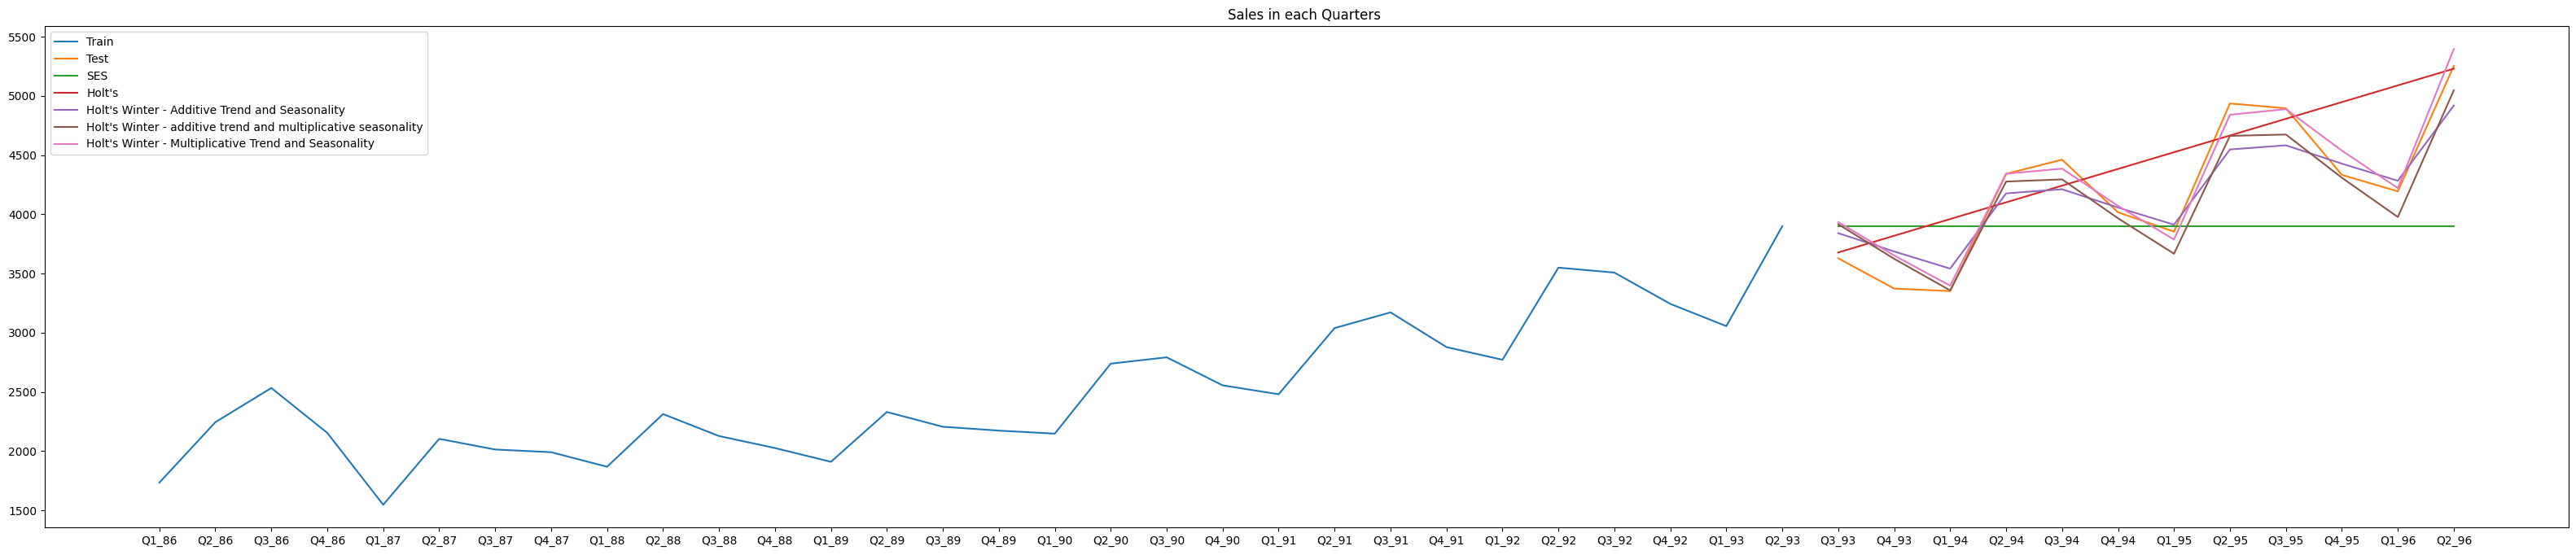

In [ ]:
plt.figure(figsize = (40,8))
plt.title("Sales in each Quarters ")
plt.plot(Train["Quarter"], Train["Sales"], label = "Train")
plt.plot(Test["Quarter"], Test["Sales"], label = "Test")
plt.plot(pred_ses, label = "SES")
plt.plot(pred_hw, label = "Holt's")
plt.plot(pred_hwadd, label = "Holt's Winter - Additive Trend and Seasonality ")
plt.plot(pred_hwmul, label = "Holt's Winter - additive trend and multiplicative seasonality")
plt.plot(pred_hwmulmul, label = "Holt's Winter - Multiplicative Trend and Seasonality")
plt.legend(loc = "best")

(0.0, 11.0)

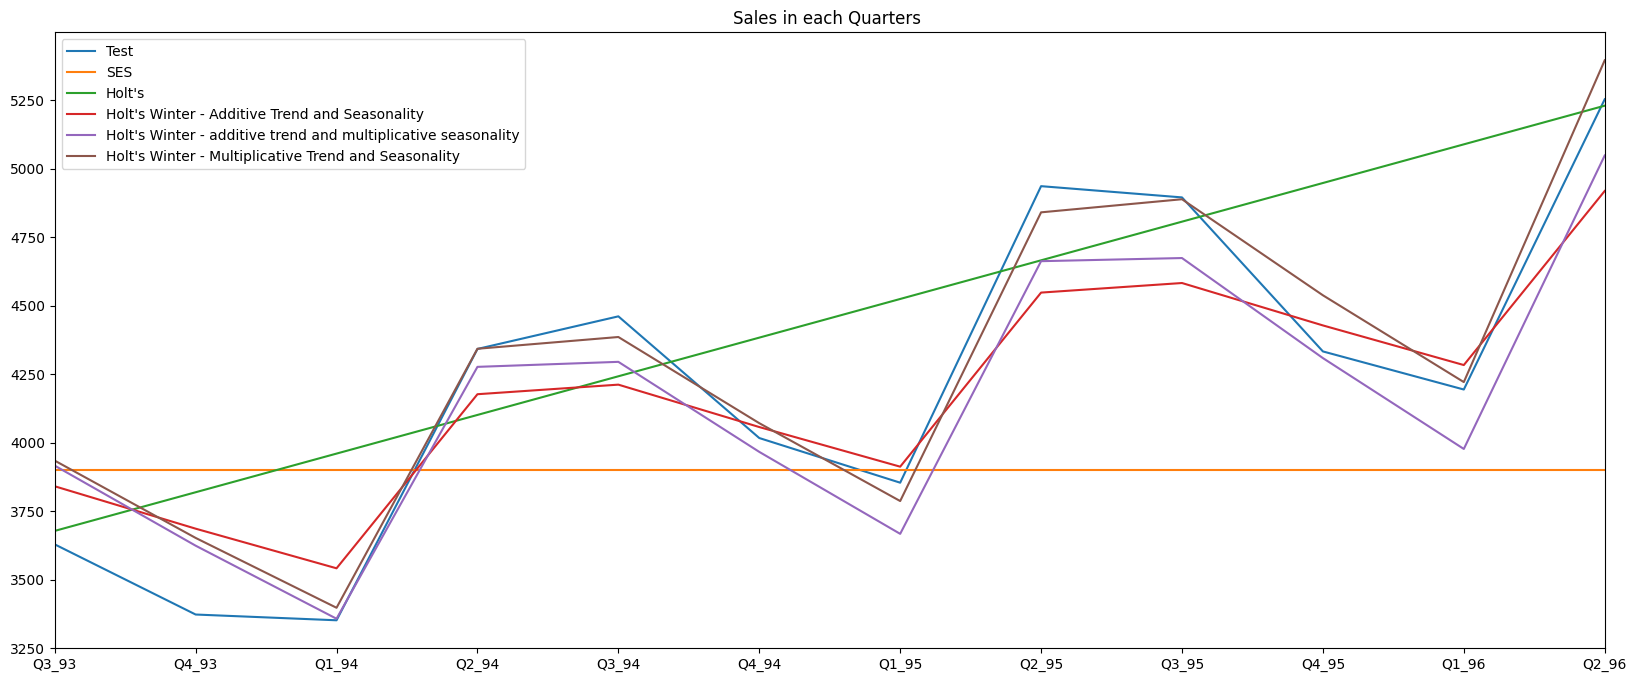

In [ ]:
plt.figure(figsize = (20,8))
plt.title("Sales in each Quarters ")
plt.plot(Test["Quarter"], Test["Sales"], label = "Test")
plt.plot(Test["Quarter"], pred_ses,label = "SES")
plt.plot(Test["Quarter"], pred_hw,label = "Holt's")
plt.plot(Test["Quarter"], pred_hwadd,label = "Holt's Winter - Additive Trend and Seasonality ")
plt.plot(Test["Quarter"], pred_hwmul,label = "Holt's Winter - additive trend and multiplicative seasonality")
plt.plot(Test["Quarter"], pred_hwmulmul,label = "Holt's Winter - Multiplicative Trend and Seasonality")
plt.legend(loc = "best")
plt.xlim("Q3_93","Q2_96")

# Model Based Forcasting Models

In [ ]:
def adf_test(Data):
  result = adfuller(Data)
  ''' perform Augmented Dickey Fuller Test on Given Data Set'''
  labels = ["ADF test statistic","p-value", "# lags used", "# obsesrvations"]
  out = pd.Series(result[0:4], index = labels)

  if result[1] <= 0.05:
      print('The time series is likely stationary.')
  else:
      print('The time series is likely non-stationary.')

In [ ]:
adfuller(coke["Sales"])

(1.309421015326811,
 0.9966611673930905,
 7,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 395.6639212829265)

In [ ]:
adf_test(coke["Sales"])

The time series is likely non-stationary.


# Model Based Forecasting

# LOG Transform

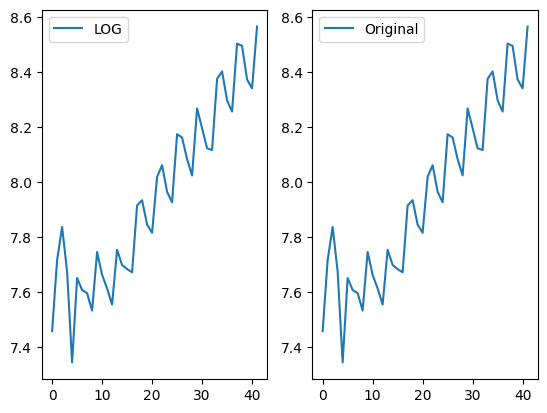

In [ ]:
plt.subplot(121)
plt.plot(coke["log_Sales"], label = "LOG")
plt.legend(loc = "best")
plt.subplot(122)
plt.plot(coke["log_Sales"], label = "Original")
plt.legend(loc = "best")
plt.show()

In [ ]:
adfuller(coke["log_Sales"])

(0.1928204385906731,
 0.9718560271303518,
 6,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 -112.79523363076055)

In [ ]:
adf_test(coke["log_Sales"])

The time series is likely non-stationary.


# BOX COX Transformation

,Sales
0,7.458663
1,7.716443
2,7.837477
3,7.675529
4,7.344602


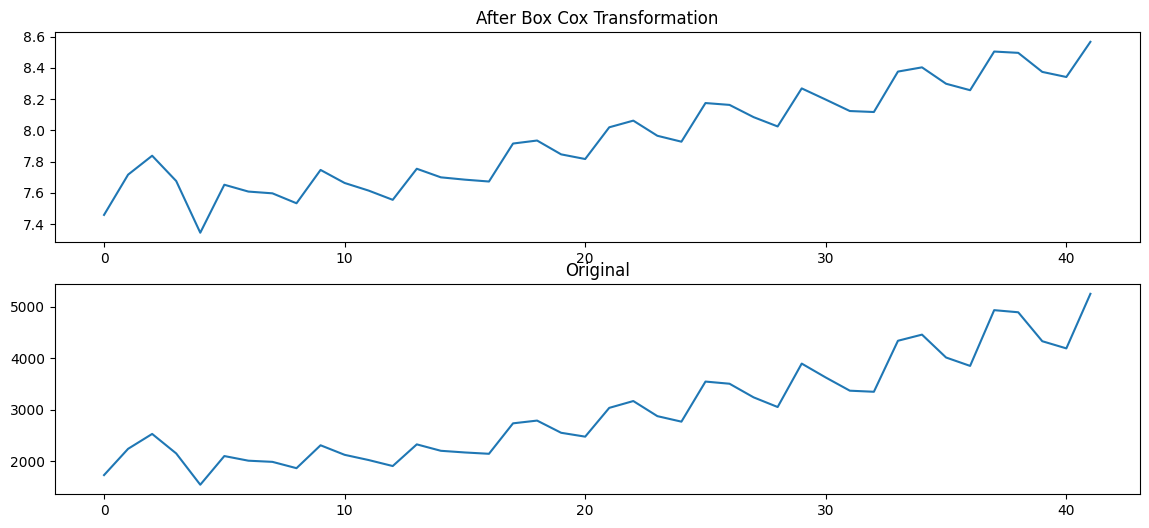

In [ ]:
BOXCOX = pd.DataFrame()
BOXCOX['Sales'] = pd.Series(boxcox(coke["Sales"], lmbda=0), coke.index)
display(BOXCOX.head())
fig, axis = plt.subplots(2,figsize=(14,6),)
axis[0].plot(BOXCOX)
axis[0].set_title('After Box Cox Transformation')
axis[1].plot(coke["Sales"], label='original')
axis[1].set_title('Original')
plt.show()

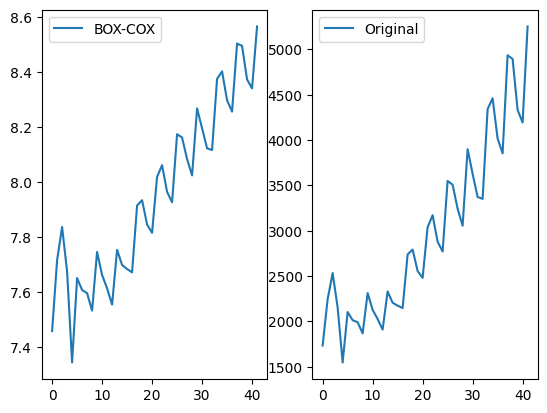

In [ ]:
plt.subplot(121)
plt.plot(BOXCOX['Sales'], label = "BOX-COX")
plt.legend(loc = "best")
plt.subplot(122)
plt.plot(coke["Sales"], label = "Original")
plt.legend(loc = "best")
plt.show()

In [ ]:
adfuller(BOXCOX['Sales'])

(0.1928204385906731,
 0.9718560271303518,
 6,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 -112.79523363076055)

In [ ]:
adf_test(BOXCOX['Sales'])

The time series is likely non-stationary.


# Differencing BOX-COX Transformations

In [ ]:
dif_boxcox = pd.DataFrame()

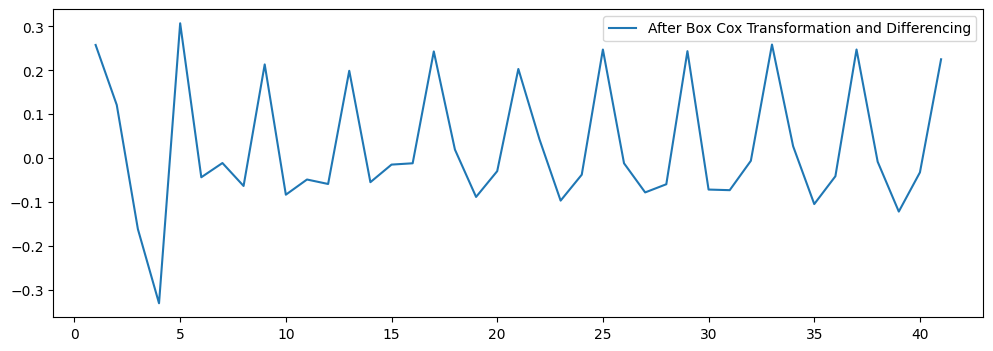

In [ ]:
dif_boxcox = BOXCOX - BOXCOX.shift()
dif_boxcox.dropna(inplace=True)
plt.figure(figsize = (12,4))
plt.plot(dif_boxcox, label = 'After Box Cox Transformation and Differencing')
plt.legend(loc = 'best')
plt.show()

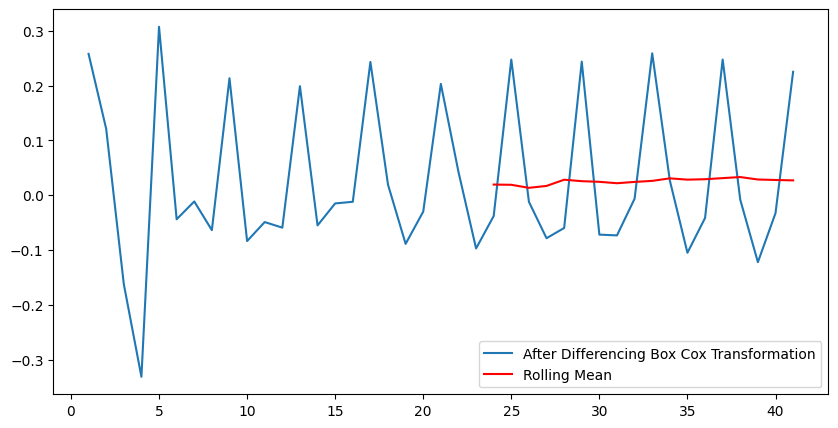

In [ ]:
plt.figure(figsize = (10,5))
plt.plot(dif_boxcox, label = 'After Differencing Box Cox Transformation')
rolling_mean = dif_boxcox.rolling(window = 24).mean()
plt.plot(rolling_mean, c = 'r', label = "Rolling Mean")
plt.legend(loc = 'best')
plt.show()

In [ ]:
adfuller(dif_boxcox)

(-3.190392315504826,
 0.020547588878929202,
 6,
 34,
 {'1%': -3.639224104416853,
  '5%': -2.9512301791166293,
  '10%': -2.614446989619377},
 -109.8177968381421)

In [ ]:
adf_test(dif_boxcox)

The time series is likely stationary.


# ARIMA

# Grid Search CV To find ARIMA Parameters

In [ ]:
def evaluate_arima_model(X, arima_order):

    X = X.astype('float32')
    train_size = int(len(X) * 0.70)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history,order= arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    #print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e:
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
evaluate_models(dif_boxcox['Sales'].values, p_values, d_values, q_values)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

LU decomposition error.


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood op

LU decomposition error.
Best ARIMA(4, 0, 0) RMSE=0.041


# Reversing Boxcox Diff model for forcacsting and predictions

In [ ]:
size=30
train_boxcox = BOXCOX[:size]
test_boxcox = BOXCOX[size:]
train_data_boxcox_diff = dif_boxcox[:size]
test_data_boxcox_diff =dif_boxcox[size:]

In [ ]:
data = dif_boxcox.Sales
X = data.values
X = X.astype('float32')

In [ ]:
lambda_boxcox = 0

In [ ]:
model = ARIMA(train_data_boxcox_diff, order=(4, 0, 0))
model_fit = model.fit()


y_hat_ar = dif_boxcox.copy()
y_hat_ar['arima_forecast'] = model_fit.predict(dif_boxcox.index.min(), dif_boxcox.index.max())
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].cumsum()
y_hat_ar['arima_forecast'] = y_hat_ar['arima_forecast'].add(train_boxcox.Sales[0])
y_hat_ar['arima_forecast'] = inv_boxcox(y_hat_ar['arima_forecast'], lambda_boxcox)


print(y_hat_ar['arima_forecast'])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


1     1675.597951
2     1398.955279
3     1250.473235
4     1722.551868
5     1951.120125
6     1749.340601
7     1376.499911
8     1766.763264
9     1662.130034
10    1633.670985
11    1596.438409
12    1959.958733
13    1814.711623
14    1730.212526
15    1667.016160
16    1965.737758
17    1791.023116
18    1667.438910
19    1646.461498
20    2028.150361
21    2002.821513
22    1790.364450
23    1752.237686
24    2104.550951
25    2088.321256
26    1867.478044
27    1822.460433
28    2279.148843
29    2191.726309
30    2033.551445
31    1991.311656
32    2477.162617
33    2281.123944
34    2130.024607
35    2151.653119
36    2606.000141
37    2378.632419
38    2242.371236
39    2322.005327
40    2737.609861
41    2483.201791
Name: arima_forecast, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [ ]:
rmse_ARIMA =  np.sqrt(mean_squared_error(Test.Sales, y_hat_ar['arima_forecast'][Test.index.min()-1:]))
rmse_ARIMA

1986.4344205777022

# Plotting Arima Forcasting

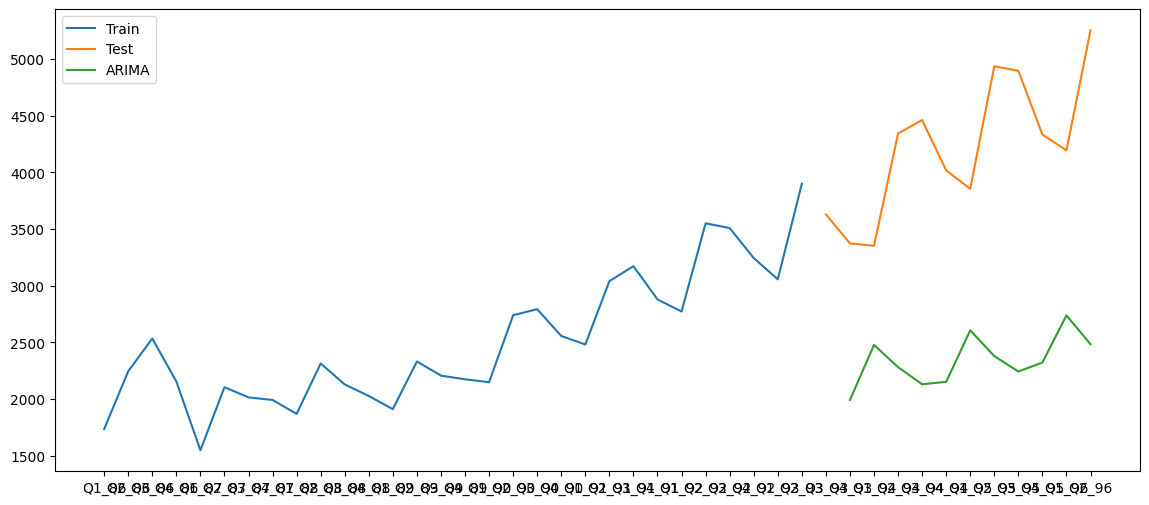

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Train['Quarter'],Train["Sales"], label='Train')
plt.plot(Test['Quarter'],Test["Sales"], label='Test')
plt.plot(y_hat_ar['arima_forecast'][Test.index.min():], label='ARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
model_residual = model_fit.resid

In [ ]:
adfuller(model_residual)

(-4.927934521939811,
 3.07611993715416e-05,
 0,
 29,
 {'1%': -3.6790595944893187,
  '5%': -2.9678817237279103,
  '10%': -2.6231583472057074},
 -68.55545748849167)

In [ ]:
adf_test(model_residual)

The time series is likely stationary.


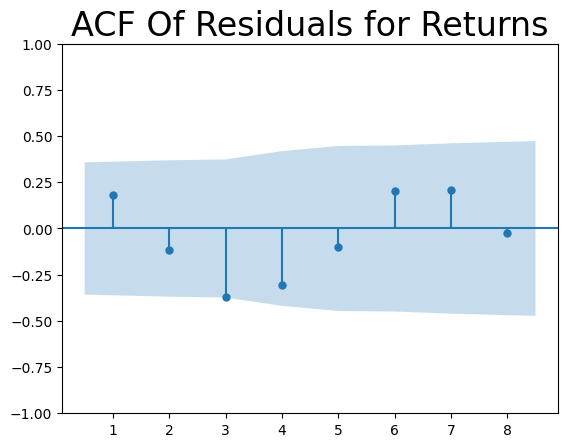

In [ ]:
tsa_plots.plot_acf(model_residual, zero = False, lags = 8)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

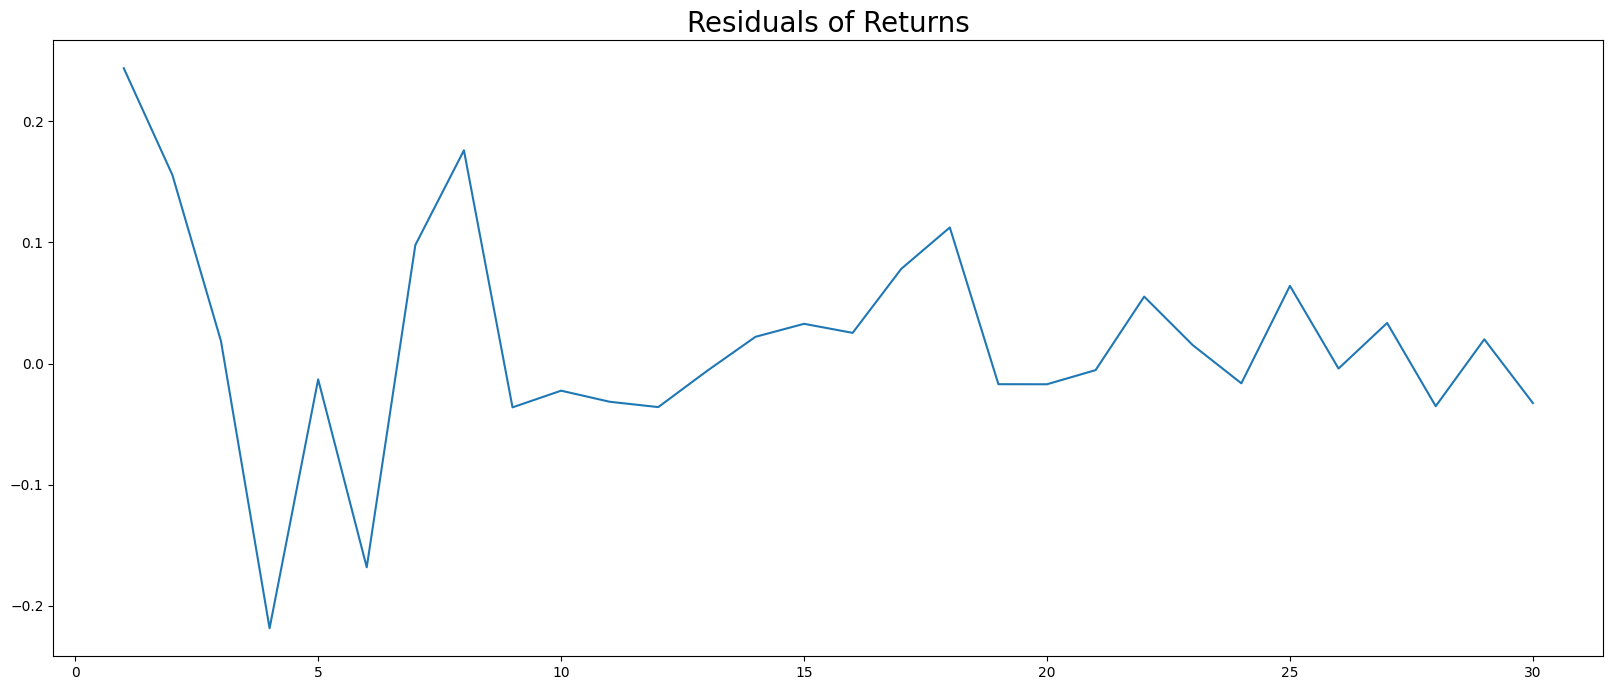

In [ ]:
model_residual.plot(figsize=(20,8))
plt.title("Residuals of Returns", size=20)
plt.show()

# SARIMA

In [ ]:
size=30

In [ ]:
train_boxcox = BOXCOX[:size]
test_boxcox = BOXCOX[size:]

In [ ]:
model = SARIMAX(train_boxcox, order=(1,1,1), seasonal_order=(1,1,1,4))
model_fit= model.fit()
y_hat_sarima = dif_boxcox.copy()

In [ ]:
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(dif_boxcox.index.min(),dif_boxcox.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

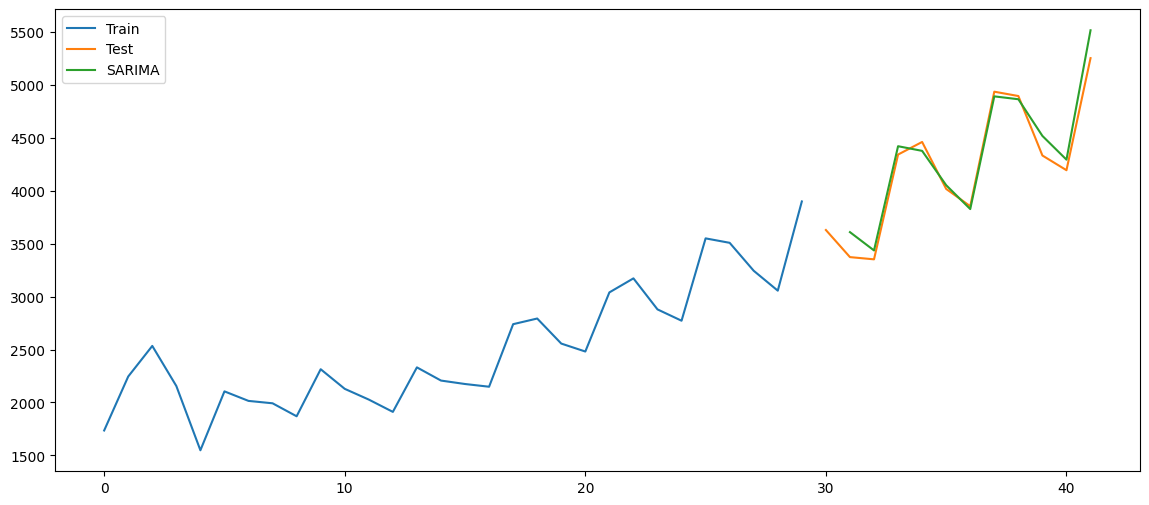

In [ ]:
plt.figure(figsize=(14,6))
plt.plot(Train["Sales"], label='Train')
plt.plot(Test["Sales"], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][Test.index.min():], label='SARIMA')
plt.legend(loc='best')
plt.show()

In [ ]:
rmse_SARIMA = np.sqrt(mean_squared_error(Test.Sales, y_hat_sarima['sarima_forecast'][Test.index.min()-1:]))
rmse_SARIMA

146.81632592763398

In [ ]:
model_residual = model_fit.resid
model_residual.mean()

0.1377191129742196

In [ ]:
adf_test(model_residual)

The time series is likely stationary.


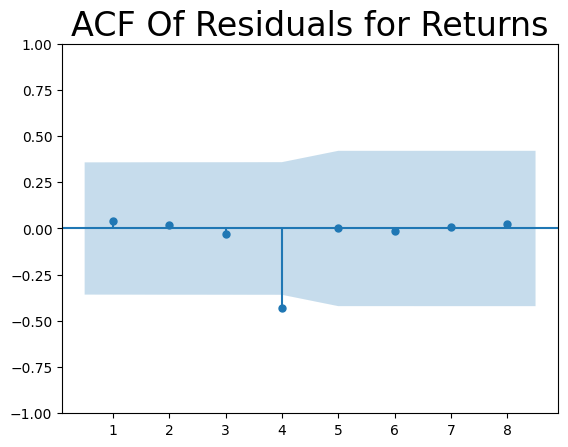

In [ ]:
tsa_plots.plot_acf(model_residual, zero = False, lags = 8)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

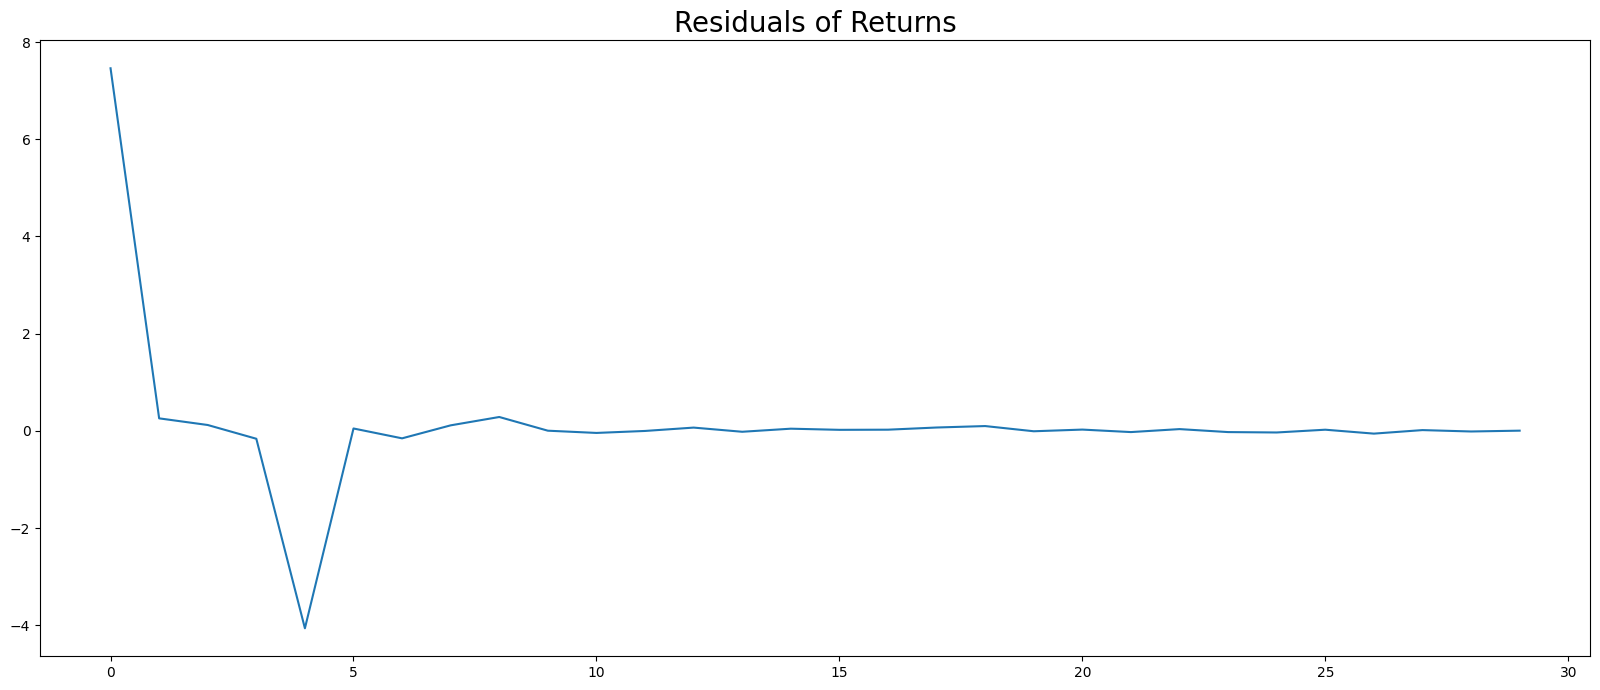

In [ ]:
model_residual.plot(figsize=(20,8))
plt.title("Residuals of Returns", size=20)
plt.show()

# RMSE of all Models

In [ ]:
RMSE=pd.DataFrame(columns=["Method","RMSE"])
RMSE["Method"]=["SES","Holt's","Holt's Winter  - Additive Trend and Seasonality ","Holt's Winter - additive trend and multiplicative seasonality",
                "Holt's Winter - Multiplicative Trend and Seasonality","ARIMA","Sarima","Linear_Model","Exponential_Model","Quadratic_model","Additive_Seasonality"
                ,"Multiplicative seasonality","Multiplicative additive seasonality"]
RMSE["RMSE"]=[rmse_ses,rmse_hw,rmse_hwadd,rmse_hwmul,rmse_hwmulmul,rmse_ARIMA,rmse_SARIMA,rmse_linear,rmse_exp,rmse_qdrtc,rmse_add_sea,rmse_mul,rmse_mul_ad]
RMSE.sort_values(by=[ "RMSE"], ascending=[True], inplace=True)

In [ ]:
RMSE.set_index("Method",inplace=True)

In [ ]:
RMSE

,RMSE
Method,
Sarima,146.816326
Holt's Winter - Multiplicative Trend and Seasonality,146.867566
Holt's Winter - additive trend and multiplicative seasonality,188.946485
Holt's Winter - Additive Trend and Seasonality,232.858395
Multiplicative additive seasonality,410.249706
Holt's,458.287921
Exponential_Model,552.282104
Quadratic_model,646.271543
SES,667.889025


# CONCLUSION and Forcasting

In [ ]:
model = SARIMAX(test_boxcox, order=(1,1,1), seasonal_order=(1,1,1,4))
model_fit= model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


# Forecast

In [ ]:
model_fit.forecast(12)

42    8.541070
43    8.413876
44    8.381687
45    8.603997
46    8.576638
47    8.448907
48    8.416686
49    8.638809
50    8.611333
51    8.483568
52    8.451345
53    8.673456
Name: predicted_mean, dtype: float64

In [ ]:
forecast=pd.DataFrame()

In [ ]:
forecast['sarima_forecast_boxcox'] = model_fit.forecast(12)
forecast['sarima_forecast'] = np.exp(forecast['sarima_forecast_boxcox'])

In [ ]:
forecast['sarima_forecast']

42    5120.821728
43    4509.204556
44    4366.369288
45    5453.411099
46    5306.235089
47    4669.966262
48    4521.891987
49    5646.598871
50    5493.564609
51    4834.671253
52    4681.364090
53    5845.669276
Name: sarima_forecast, dtype: float64

# Visualization of Forecast model

In [ ]:
coke_DATE = Test["Date"]
coke_DATE = pd.PeriodIndex(coke_DATE, freq="M")

In [ ]:
forecast_dates = coke_DATE+36

In [ ]:
forecast_dates = forecast_dates.to_timestamp()

In [ ]:
forecast_dates

DatetimeIndex(['1996-07-01', '1996-10-01', '1997-01-01', '1997-04-01',
               '1997-07-01', '1997-10-01', '1998-01-01', '1998-04-01',
               '1998-07-01', '1998-10-01', '1999-01-01', '1999-04-01'],
              dtype='datetime64[ns]', name='Date', freq='QS-OCT')

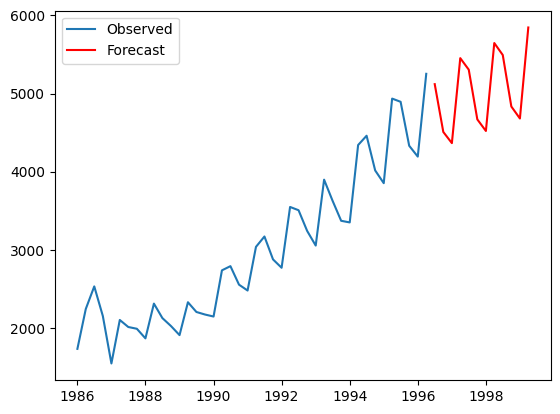

In [ ]:
plt.plot(coke["Date"], coke["Sales"].values, label='Observed')
plt.plot(forecast_dates, forecast['sarima_forecast'], color='r', label='Forecast')
plt.legend()
plt.show()